<a href="https://colab.research.google.com/github/RaneemAlharthi/Online-Abusive-Attacks-OAA-Dataset/blob/main/DONE_TASK_3_Exp_6_Final_Version_(Text%2C_Meta_text%2CAccount)_features_combination_Hate_Abuse_Retweet_Prediction_v2_Latest_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hate/Abuse Specech Prediction on Tweets

Author - Raneem Abdullah

---

### Research background
---

The task is consist of two parts:

1-The first one is to predict weather the parent tweet (text) will receive abusive reply or not. using (tweet and replies) text classification to tarin the model (baseline) and then we will compare that prediction with the prediction that we get when we add the targets characteristics which are (account and tweet metadata).

2-The second one is to predict whether the reply is abusive or not using the parent tweet text as baseline and then compare it with target characteristics the base line is the reply text classification. You have a sample of a single user account. In the conversation, that what we will use.

#### Import the required libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive'
!ls

Mounted at /content/drive
/content/drive/My Drive
'ACCOUNT based features.csv'
'ACCOUNT-based-features .csv'
'ACCOUNT based features.gsheet'
'All Features - Quantify Number of replies (how many hateful replies) a Tweet might Get?'
 char_bigram_features.csv
'Classification -February - All Features - Hate vs Non- Hate Classification .ipynb'
'Classification -February - Only Account based features- Hate vs Non- Hate Classification .ipynb'
'Classification-February - Only Accounts features (with BIO) - Hate vs Non- Hate Classification .ipynb'
'Classification -February - Only Meta features- Hate vs Non- Hate Classification .ipynb'
'Classification-February - Only Meta features (with BIO) - Hate vs Non- Hate Classification .ipynb'
'Colab Notebooks'
'Copy of Classification -February - All Features - Hate vs Non- Hate Classification .ipynb'
'Copy of final_prcessed_dataframe_with_all_features_v2.csv'
'Copy of subset_dataset.csv'
 dataset
 dictionaries
'Exp 1 - Final Version- Hate-Abuse Retweet Pre

In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import missingno as msno
from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import re
import nltk
import itertools
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import KFold

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import itertools
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase

# Scipy
from scipy import interpolate
from scipy import spatial
from scipy import stats
from scipy.cluster import hierarchy
import datetime as dt
import seaborn as sns
import pickle
from math import modf
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model

## Plot Styling and Configurations
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
         'axes.labelsize': '16',
         'axes.titlesize':'24',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Load the dataset

In [ ]:
import csv
import warnings

# Suppress the DtypeWarning
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = pd.read_csv('dataset/userStatsFromCSVsWithIndivTweets.csv', quoting=csv.QUOTE_ALL, nrows=100)
df = pd.read_csv('dataset/userStatsFromCSVsWithIndivTweets.csv', quoting=csv.QUOTE_ALL, nrows=1000000, usecols = list(df.columns[2:53]))
df.head(1)

Parent tweet text Parent tweet place Parent tweet geo location Parent tweet hashtags Parent tweet symbols Parent tweet user mentions                                  Parent tweet URLs Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites Direct reply 1 text Direct reply 2 text Direct reply 3 text Direct reply 4 text Direct reply 5 text Direct reply 6 text Direct reply 7 text Direct reply 8 text Direct reply 9 text Direct reply 10 text Direct reply 11 text Direct reply 12 text Direct reply 13 text Direct reply 14 text Direct reply 15 text Direct reply 16 text Direct reply 17 text Direct reply 18 text Direct reply 19 text Direct reply 20 text Direct reply 21 text Direct reply 22 text Direct reply 23 text Direct reply 24 text Direct reply 25 text Direct reply 26 text Direct reply 27 text Direct reply 28 text Direct reply 29 text Direct reply 30 text Direct reply 31 text Direct reply 32 text  \
0  Define the terms listed below. You should writ...               None                      None                    []                   []                         []  [{'url': 'https://t.co/PqzrmvP8Ge'; 'expanded_...               False                     False                         0                          0                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   

  Direct reply 33 text Direct reply 34 text Direct reply 35 text Direct reply 36 text Direct reply 37 text Direct reply 38 text Direct reply 39 text Direct reply 40 text  
0                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN

In [ ]:
df.shape

(1000000, 51)

In [ ]:
df.isnull().sum().sum()

39930661

In [ ]:
df.head()

Parent tweet text Parent tweet place Parent tweet geo location Parent tweet hashtags Parent tweet symbols Parent tweet user mentions                                  Parent tweet URLs Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites Direct reply 1 text Direct reply 2 text Direct reply 3 text Direct reply 4 text Direct reply 5 text Direct reply 6 text Direct reply 7 text Direct reply 8 text Direct reply 9 text Direct reply 10 text Direct reply 11 text Direct reply 12 text Direct reply 13 text Direct reply 14 text Direct reply 15 text Direct reply 16 text Direct reply 17 text Direct reply 18 text Direct reply 19 text Direct reply 20 text Direct reply 21 text Direct reply 22 text Direct reply 23 text Direct reply 24 text Direct reply 25 text Direct reply 26 text Direct reply 27 text Direct reply 28 text Direct reply 29 text Direct reply 30 text Direct reply 31 text Direct reply 32 text  \
0  Define the terms listed below. You should writ...               None                      None                    []                   []                         []  [{'url': 'https://t.co/PqzrmvP8Ge'; 'expanded_...               False                     False                         0                          0                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
1  the relationships between exchange rate and ex...               None                      None                    []                   []                         []  [{'url': 'https://t.co/bj7twKlyTa'; 'expanded_...               False                     False                         0                          0                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
2           science fiction https://t.co/M7yLxOvadx                None                      None                    []                   []                         []  [{'url': 'https://t.co/M7yLxOvadx'; 'expanded_...               False                     False                         0                          0                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
3  Chronic Pulmonary Disease (COPD) | https://t.c...               None                      None  

In [ ]:
df.isnull().sum()

Parent tweet text                134
Parent tweet place              8334
Parent tweet geo location       8335
Parent tweet hashtags           8336
Parent tweet symbols            8336
Parent tweet user mentions      8336
Parent tweet URLs               8336
Parent quote status             8336
Parent possibly sensitive       8336
Parent tweet num retweets       8509
Parent tweet num favorites      8509
Direct reply 1 text           975509
Direct reply 2 text           986531
Direct reply 3 text           990128
Direct reply 4 text           991965
Direct reply 5 text           993144
Direct reply 6 text           993952
Direct reply 7 text           994609
Direct reply 8 text           995094
Direct reply 9 text           995529
Direct reply 10 text          995872
Direct reply 11 text          996138
Direct reply 12 text          996356
Direct reply 13 text          996569
Direct reply 14 text          996779
Direct reply 15 text          996942
Direct reply 16 text          997078
D

In [ ]:
df = df.dropna(subset=["Direct reply 1 text"])
df.shape

(24491, 51)

In [ ]:
df.head()

Parent tweet text Parent tweet place Parent tweet geo location                              Parent tweet hashtags Parent tweet symbols Parent tweet user mentions Parent tweet URLs Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                Direct reply 1 text     Direct reply 2 text                                Direct reply 3 text Direct reply 4 text Direct reply 5 text Direct reply 6 text Direct reply 7 text Direct reply 8 text Direct reply 9 text Direct reply 10 text Direct reply 11 text Direct reply 12 text Direct reply 13 text Direct reply 14 text Direct reply 15 text Direct reply 16 text Direct reply 17 text Direct reply 18 text Direct reply 19 text Direct reply 20 text Direct reply 21 text Direct reply 22 text Direct reply 23 text Direct reply 24 text Direct reply 25 text Direct reply 26 text Direct reply 27 text Direct reply 28 text Direct reply 29 text  \
14551  #ÖzgeYağiz #GökberkDemirci 🥰🥰 https://t.co/shU...               None                      None  [{'text': 'ÖzgeYağiz'; 'indices': [0; 10]}; {'...                   []                         []                []               False                     False                         2                         31                                   @idabaes1 💝❤️💖😍🧿                     NaN                                                NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
14552  Who wanted a photo from yemin couple ? 🤭  the ...               None                      None  [{'text': 'reyem'; 'indices': [81; 87]}; {'tex...                   []                         []                []               False                     False                         1                         44  @idabaes1 One and only;  the best couple ReyEm...             @idabaes1 ✋  @idabaes1 I wanted all shooting pics. From whe...                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
14553  Now we know for sure that in this sceene were ...               None                      None  [{'text': 'reyem'; 'indices': [50; 56]}; {'tex...                   []                         []                []               False                     False                         6                         42                                   @idabaes1 ❤❤❤❤🧿♾    @idabaes1 😍😍😍❤❤❤❤😍😍💔                                                NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN                  NaN   
14554  #GökberkDemirci #ÖzgeYağiz  🥰🥰 https://t.co/TB...               None                

In [ ]:
data = df.copy()
#df = data.copy()

In [ ]:
columns_to_merge  = df.columns[11:]

In [ ]:
columns_to_merge

Index(['Direct reply 1 text', 'Direct reply 2 text', 'Direct reply 3 text', 'Direct reply 4 text', 'Direct reply 5 text', 'Direct reply 6 text', 'Direct reply 7 text', 'Direct reply 8 text', 'Direct reply 9 text', 'Direct reply 10 text', 'Direct reply 11 text', 'Direct reply 12 text', 'Direct reply 13 text', 'Direct reply 14 text', 'Direct reply 15 text', 'Direct reply 16 text', 'Direct reply 17 text', 'Direct reply 18 text', 'Direct reply 19 text', 'Direct reply 20 text', 'Direct reply 21 text', 'Direct reply 22 text', 'Direct reply 23 text', 'Direct reply 24 text', 'Direct reply 25 text', 'Direct reply 26 text', 'Direct reply 27 text', 'Direct reply 28 text', 'Direct reply 29 text', 'Direct reply 30 text', 'Direct reply 31 text', 'Direct reply 32 text', 'Direct reply 33 text', 'Direct reply 34 text', 'Direct reply 35 text', 'Direct reply 36 text', 'Direct reply 37 text', 'Direct reply 38 text', 'Direct reply 39 text', 'Direct reply 40 text'], dtype='object')

In [ ]:
# Merge the specified columns into a single column
df['DirectReply'] = df[columns_to_merge].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the specified columns
df.drop(columns=columns_to_merge, inplace=True)

In [ ]:
df.columns

Index(['Parent tweet text', 'Parent tweet place', 'Parent tweet geo location', 'Parent tweet hashtags', 'Parent tweet symbols', 'Parent tweet user mentions', 'Parent tweet URLs', 'Parent quote status', 'Parent possibly sensitive', 'Parent tweet num retweets', 'Parent tweet num favorites', 'DirectReply'], dtype='object')

In [ ]:
df = df[['Parent tweet text', 'DirectReply', 'Parent quote status', 'Parent possibly sensitive', 'Parent tweet num retweets', 'Parent tweet num favorites']].reset_index(drop = True)
df.columns = ['ParentTweet', 'DirectReply', 'Parent quote status', 'Parent possibly sensitive', 'Parent tweet num retweets', 'Parent tweet num favorites']
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites
0  #ÖzgeYağiz #GökberkDemirci 🥰🥰 https://t.co/shU...                                   @idabaes1 💝❤️💖😍🧿               False                     False                         2                         31
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44
2  Now we know for sure that in this sceene were ...              @idabaes1 ❤❤❤❤🧿♾ @idabaes1 😍😍😍❤❤❤❤😍😍💔               False                     False                         6                         42
3  #GökberkDemirci #ÖzgeYağiz  🥰🥰 https://t.co/TB...  @idabaes1 @yagizozge #ozgeyagiz #gokberkdemirc...               False                     False                         3                         38
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24

In [ ]:
df.reset_index(drop = True, inplace = True)
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites
0  #ÖzgeYağiz #GökberkDemirci 🥰🥰 https://t.co/shU...                                   @idabaes1 💝❤️💖😍🧿               False                     False                         2                         31
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44
2  Now we know for sure that in this sceene were ...              @idabaes1 ❤❤❤❤🧿♾ @idabaes1 😍😍😍❤❤❤❤😍😍💔               False                     False                         6                         42
3  #GökberkDemirci #ÖzgeYağiz  🥰🥰 https://t.co/TB...  @idabaes1 @yagizozge #ozgeyagiz #gokberkdemirc...               False                     False                         3                         38
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24

### Define Helper functions for Text Cleaning

In [ ]:
import re,string
FLAGS = re.MULTILINE | re.DOTALL

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


def allcaps(text):
    text = text.group()
    return text.lower() + " "

def clean_text(text):
    # Different regex parts for smiley faces
    eyes = r"[8:=;]"
    nose = r"['`\-]?"

    # function so code less repetitive
    def re_sub(pattern, repl):
        return re.sub(pattern, repl, text, flags=FLAGS)

    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "")
    text = re_sub(r"/", "")
    text = re_sub(r"@\w+", "")
    text = re_sub(r"{}{}[)dD]+|[)dD]+{}{}".format(eyes, nose, nose, eyes), "")
    text = re_sub(r"{}{}p+".format(eyes, nose), "")
    text = re_sub(r"{}{}\(+|\)+{}{}".format(eyes, nose, nose, eyes), "")
    text = re_sub(r"{}{}[\/|l*]".format(eyes, nose), "")
    text = re_sub(r"<3","")
    text = re_sub(r"[-+]?[.\d]*[\d]+[:,.\d]*", "")
    text = re_sub(r"([!?.]){2,}", "")
    text = re_sub(r"\b(\S*?)(.)\2{2,}\b", "")

    return text.lower()

In [ ]:
df['cleaned_ParentTweet'] = df['ParentTweet'].apply(clean_text)
df['cleaned_DirectReply'] = df['DirectReply'].apply(clean_text)

In [ ]:
# Assuming 'cleaned_ParentTweet' is the name of the column you want to modify
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].str.replace(r'#[\w]+', '')  # Remove hashtags
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].str.replace(r'[^\w\s]', '')  # Remove symbols

df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].str.replace(r'[^\w\s⛔]', '')

In [ ]:
# Assuming 'cleaned_DirectReply' is the name of the column you want to modify
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].str.replace(r'#[\w]+', '')  # Remove hashtags
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].str.replace(r'[^\w\s]', '')  # Remove symbols

df['cleaned_DirectReply'] = df['cleaned_DirectReply'].str.replace(r'[^\w\s⛔]', '')

In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply
0  #ÖzgeYağiz #GökberkDemirci 🥰🥰 https://t.co/shU...                                   @idabaes1 💝❤️💖😍🧿               False                     False                         2                         31                                                                                                      
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44  who wanted a photo from yemin couple    the on...   one and only  the best couple reyem ozgok yem...
2  Now we know for sure that in this sceene were ...              @idabaes1 ❤❤❤❤🧿♾ @idabaes1 😍😍😍❤❤❤❤😍😍💔               False                     False                         6                         42  now we know for sure that in this sceene were ...                                                   
3  #GökberkDemirci #ÖzgeYağiz  🥰🥰 https://t.co/TB...  @idabaes1 @yagizozge #ozgeyagiz #gokberkdemirc...               False                     False                         3                         38                                                                                                      
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  for schizophrenics who say the photos are ol i...   whatz their bloody prblm lets just agree with...

In [ ]:
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].str.strip().replace('', np.nan)
df = df.dropna(subset=["cleaned_DirectReply"])
df.shape

(22903, 8)

In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44  who wanted a photo from yemin couple    the on...  one and only  the best couple reyem ozgok yemi...
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  for schizophrenics who say the photos are ol i...  whatz their bloody prblm lets just agree with ...
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4              prideless woman with stupid fans       enough is enough this woman should line up wit...
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  this parsite  is still alive     i kmow you ve...  shes indeed a real witch  look at her  she say...
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2  please report those ig as spam  sick mind peop...                   hesabı kapanmış mi çıkmadı bende

### Extract Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

stemmer = SnowballStemmer("english")
df['stemmed'] = df.cleaned_DirectReply.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

# WORD LEVEL N-GRAMS (keep numbers as they represent unicode for emojis)
cv = CountVectorizer(stop_words='english', min_df=.002, max_df=.8, ngram_range=(1,2), max_features=5000)
cv.fit(df.stemmed)
cv_mat = cv.transform(df.stemmed)

bigrams = pd.DataFrame(cv_mat.todense(), index=df.index, columns=cv.get_feature_names_out())
bigrams = bigrams.add_prefix('word_bigrams:')
bigrams.to_csv('word_bigram_features.csv')


print ('Non-zero count:', cv_mat.nnz)
print ('Sparsity: %.2f%%' % (100.0 * cv_mat.nnz / (cv_mat.shape[0] * cv_mat.shape[1])))
oc = np.asarray(cv_mat.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cv.get_feature_names_out(), '# occurrences': oc})
counts_df.sort_values(by='# occurrences', ascending=False).head(20)

###########################################################################################################
#CHARACTER LEVEL N-GRAMS (remove unicode numbers first as they are not valuable at character level; also do not stem!)

df['char_stem'] = df.DirectReply.apply(lambda x: x.translate(str.maketrans('','',string.digits)))

cv_char = CountVectorizer(analyzer='char', stop_words='english',min_df=.002, max_df=.8,ngram_range=(1,2), max_features=5000)
cv_char.fit(df.char_stem)
cv_char_mat = cv_char.transform(df.char_stem)


char_bigrams = pd.DataFrame(cv_char_mat.todense(), index=df.index, columns=cv_char.get_feature_names_out())
char_bigrams = char_bigrams.add_prefix('char_bigrams:')

char_bigrams.to_csv('char_bigram_features.csv')

print ('Non-zero count:', cv_char_mat.nnz)
print ('Sparsity: %.2f%%' % (100.0 * cv_char_mat.nnz / (cv_char_mat.shape[0] * cv_char_mat.shape[1])))
oc2 = np.asarray(cv_char_mat.sum(axis=0)).ravel().tolist()
counts_df2 = pd.DataFrame({'Term': cv_char.get_feature_names_out(), '# occurrences': oc2})
counts_df2.sort_values(by='# occurrences', ascending=False).head(20)

###########################################################################################################
#TFIDF VALUES
cv = CountVectorizer(min_df=.002, max_df=.8, ngram_range=(1,2), max_features=5000)
cv.fit(df.stemmed)
cv_mat = cv.transform(df.stemmed)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cv_mat)

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cv.get_feature_names_out(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(80)
transformed_weights.toarray()

tf_idf =pd.DataFrame(transformed_weights.todense(), index=df.index, columns=cv.get_feature_names_out())

tf_idf = tf_idf.add_prefix('tfidf:')

tf_idf.to_csv('tfidf_features.csv')

Non-zero count: 592322
Sparsity: 0.82%
Non-zero count: 3720607
Sparsity: 5.49%


In [ ]:
# hate database
dict1=pd.read_csv('dictionaries/hatebase_dict.csv', encoding = 'ISO-8859-1', header = None)
dict1.columns = ['dic']
dict11 = dict1['dic']
dic1 = []
for row in dict11:
    row = row.strip("',")
    dic1.append(row)

#print(dic)
# negative words lexicon
dict2=pd.read_csv('dictionaries/negative-word.csv', encoding = 'ISO-8859-1')
dict2.columns = ['dic']
dict21 = dict2['dic']
dic2 = []
for row in dict21:
    row = row.strip("',")
    dic2.append(row)

# postive word lexicon
dict3=pd.read_csv('dictionaries/Postive-words.csv', encoding = 'ISO-8859-1')
dict3.columns = ['dic']
dict31 = dict3['dic']
dic3 = []
for row in dict31:
    row = row.strip("',")
    dic3.append(row)

In [ ]:
base = pd.read_csv("dictionaries/lexicon_wiegand/baseLexicon.txt", delimiter="\t", names=["word", "class"])
expanded = pd.read_csv("dictionaries/lexicon_wiegand/expandedLexicon.txt", delimiter="\t", names=["word", "class"])
manual = pd.read_csv("dictionaries/lexicon_wiegand/lexicon.manual.all.csv", header=0)

base_abusive = base[base['class']]
exp_abusive = expanded[expanded['class'] > 0]
manual_abusive = manual[manual['class']]

In [ ]:
manual_abusive = manual_abusive['word']
manual_abusive.columns = ['dic']
exp_abusive['word'] =  exp_abusive['word'].str.split('_').str[0]
exp_abusive = exp_abusive['word']
exp_abusive.columns = ['dic']
base_abusive = base_abusive['word']
base_abusive.columns = ['dic']

In [ ]:
abusive_lexicon_wiegand =  pd.concat([manual_abusive, exp_abusive, base_abusive], axis = 0)

In [ ]:
abusive_lexicon_wiegand = pd.DataFrame(abusive_lexicon_wiegand)
abusive_lexicon_wiegand.columns = ['dic']

In [ ]:
dict1['dic'] = dict1['dic'].str.replace("'", '')
dict1['dic'] = dict1['dic'].str.replace(",", '')

In [ ]:
dict1 = pd.concat([dict1, abusive_lexicon_wiegand], axis = 0)

In [ ]:
df.dropna(inplace = True)

In [ ]:
dict1.head()

dic
0  uncivilised
1         gypo
2        gypos
3         cunt
4        cunts

In [ ]:
dict1.shape

(4725, 1)

In [ ]:
tweet = df['cleaned_DirectReply']
tweet1 = tweet.str.split(" ")

hate = np.zeros(len(df))
hatenor = np.zeros(len(df))

for i, tweet_words in enumerate(tweet1):
    count = 0
    for word in tweet_words:
        if word in dic1:
            count += 1
    hate[i] = count
    hatenor[i] = count / len(tweet_words)

neg = np.zeros(len(df))
negnor = np.zeros(len(df))

for i, tweet_words in enumerate(tweet1):
    count = 0
    for word in tweet_words:
        if word in dic2:
            count += 1
    neg[i] = count
    negnor[i] = count / len(tweet_words)

pos = np.zeros(len(df))
posnor = np.zeros(len(df))

for i, tweet_words in enumerate(tweet1):
    count = 0
    for word in tweet_words:
        if word in dic3:
            count += 1
    pos[i] = count
    posnor[i] = count / len(tweet_words)

df["hate_counts"] = hate
df["hate_normalised_score"] = hatenor
df["neg_counts"] = neg
df["neg_normalised_score"] = negnor
df["pos_counts"] = pos
df["pos_normalised_score"] = posnor


In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44  who wanted a photo from yemin couple    the on...  one and only  the best couple reyem ozgok yemi...  one and onli  the best coupl reyem ozgok yemin...  @idabaes One and only;  the best couple ReyEm ...          0.0               0.000000         0.0              0.000000         1.0              0.041667
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  for schizophrenics who say the photos are ol i...  whatz their bloody prblm lets just agree with ...  whatz their bloodi prblm let just agre with th...  @idabaes Whatz their bloody prblm? Let's just ...          1.0               0.020408         3.0              0.061224         0.0              0.000000
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4              prideless woman with stupid fans       enough is enough this woman should line up wit...  enough is enough this woman should line up wit...  @idabaes @cansutuman enough is enough; this wo...          0.0               0.000000         1.0              0.010870         4.0              0.043478
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  this parsite  is still alive     i kmow you ve...  shes indeed a real witch  look at her  she say...  shes inde a real witch  look at her  she say y...  @idabaes She's indeed a real witch 🤮 look at h...          0.0               0.000000         4.0              0.056338         4.0              0.056338
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2  please report those ig as spam  sick mind peop...                   hesabı kapanmış mi çıkmadı bende                    hesabı kapanmış mi çıkmadı bend   @idabaes @Fatma Hesabı kapanmış mi çıkmadı bende          0.0               0.000000         0.0              0.000000         0.0              0.000000

## Checking for missing values

In [ ]:
df.isnull().sum()

ParentTweet                   0
DirectReply                   0
Parent quote status           0
Parent possibly sensitive     0
Parent tweet num retweets     0
Parent tweet num favorites    0
cleaned_ParentTweet           0
cleaned_DirectReply           0
stemmed                       0
char_stem                     0
hate_counts                   0
hate_normalised_score         0
neg_counts                    0
neg_normalised_score          0
pos_counts                    0
pos_normalised_score          0
dtype: int64

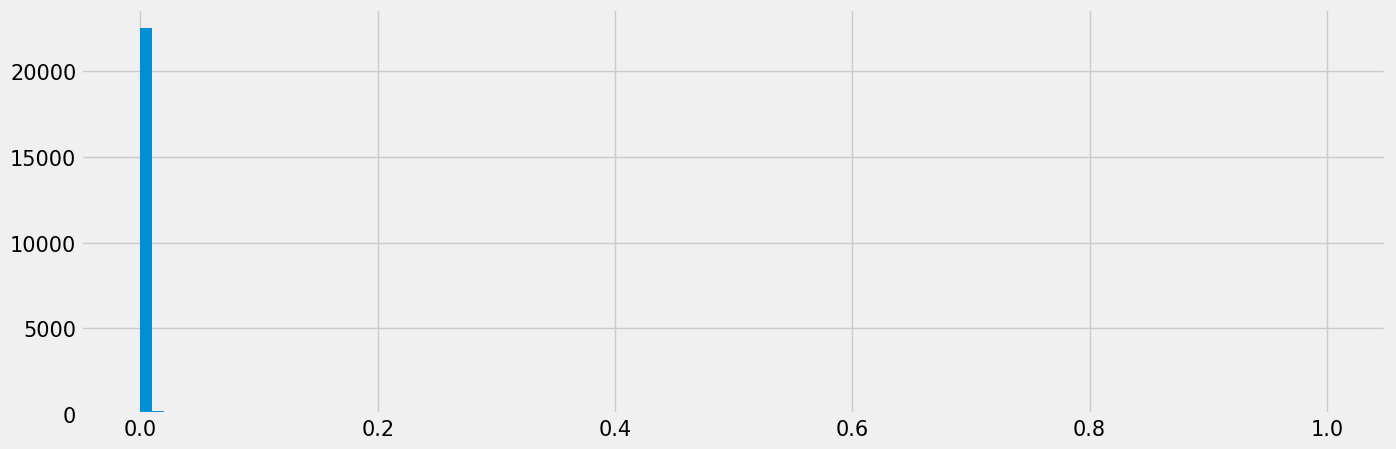

In [ ]:
df['hate_normalised_score'].hist(bins = 100);

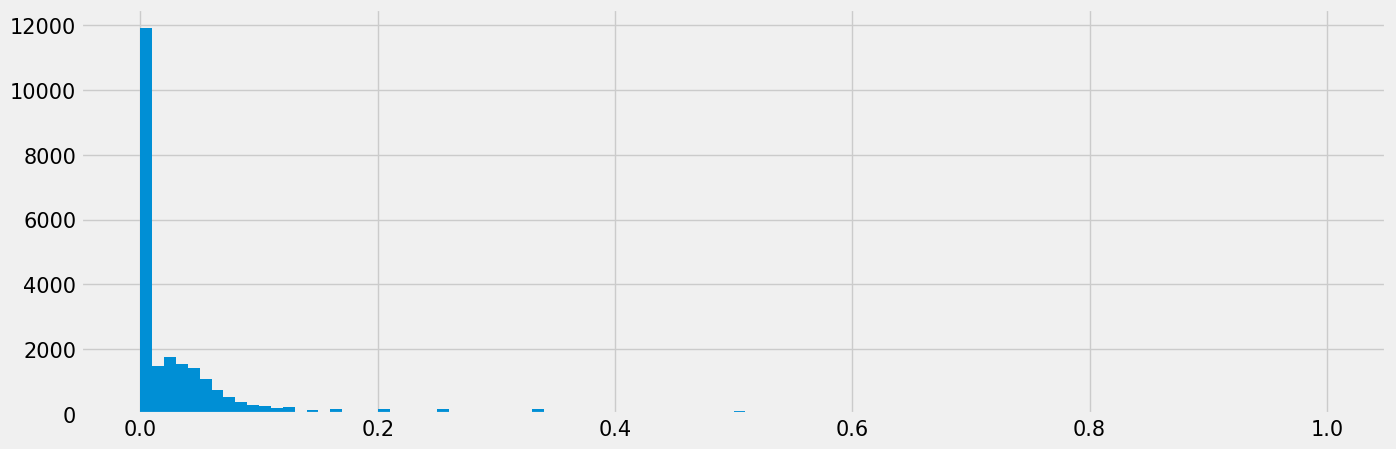

In [ ]:
df['neg_normalised_score'].hist(bins = 100);

In [ ]:
df['neg_normalised_score'].describe()

count    22903.000000
mean         0.034371
std          0.078355
min          0.000000
25%          0.000000
50%          0.005464
75%          0.042735
max          1.000000
Name: neg_normalised_score, dtype: float64

In [ ]:
def create_target_variable(row):
    if row['hate_normalised_score'] > 0.05 or row['neg_normalised_score'] > 0.05:
        val = 'Hatred/Abusive Reply'
    else:
        val = 'Normal Reply'
    return val

df['Hatred/Abusive'] = df.apply(create_target_variable, axis=1)

In [ ]:
df['Hatred/Abusive'].value_counts()

Normal Reply            18213
Hatred/Abusive Reply     4690
Name: Hatred/Abusive, dtype: int64

In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score        Hatred/Abusive
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44  who wanted a photo from yemin couple    the on...  one and only  the best couple reyem ozgok yemi...  one and onli  the best coupl reyem ozgok yemin...  @idabaes One and only;  the best couple ReyEm ...          0.0               0.000000         0.0              0.000000         1.0              0.041667          Normal Reply
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  for schizophrenics who say the photos are ol i...  whatz their bloody prblm lets just agree with ...  whatz their bloodi prblm let just agre with th...  @idabaes Whatz their bloody prblm? Let's just ...          1.0               0.020408         3.0              0.061224         0.0              0.000000  Hatred/Abusive Reply
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4              prideless woman with stupid fans       enough is enough this woman should line up wit...  enough is enough this woman should line up wit...  @idabaes @cansutuman enough is enough; this wo...          0.0               0.000000         1.0              0.010870         4.0              0.043478          Normal Reply
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  this parsite  is still alive     i kmow you ve...  shes indeed a real witch  look at her  she say...  shes inde a real witch  look at her  she say y...  @idabaes She's indeed a real witch 🤮 look at h...          0.0               0.000000         4.0              0.056338         4.0              0.056338  Hatred/Abusive Reply
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2  please report those ig as spam  sick mind peop...                   hesabı kapanmış mi çıkmadı bende                    hesabı kapanmış mi çıkmadı bend   @idabaes @Fatma Hesabı kapanmış mi çıkmadı bende          0.0               0.000000         0.0              0.000000         0.0              0.000000          Normal Reply

### Distribution of Target Variable

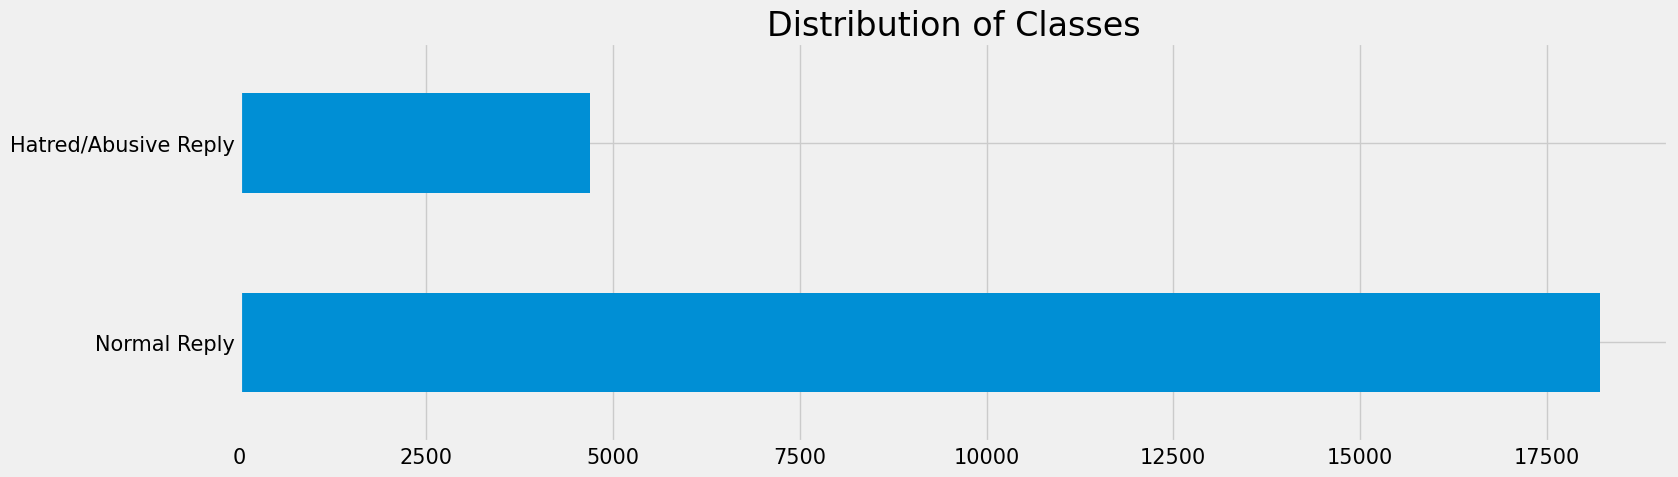

In [ ]:
plt.figure(figsize=(17,5))
df['Hatred/Abusive'].value_counts().plot(kind = 'barh')
plt.title("Distribution of Classes")
plt.tight_layout()
plt.show();

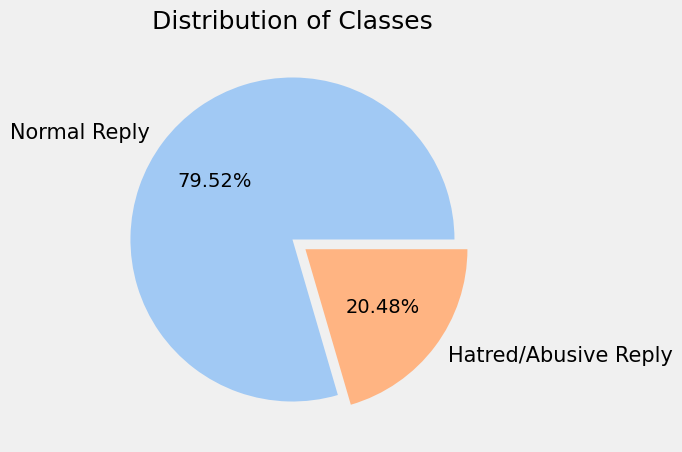

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Distribution of Classes', fontsize = 18)
plt.pie(df['Hatred/Abusive'].value_counts(),labels=['Normal Reply','Hatred/Abusive Reply'],colors=sns.color_palette('pastel'),
        explode=[0,0.1],autopct='%.2f%%')
plt.show();

### Creating some textual meta-features

### Creating a new column which stores the information for the length of the column

In [ ]:
df['length_parent_tweet'] = df['ParentTweet'].apply(len)
df['length_direct_reply'] = df['DirectReply'].apply(len)
df.head(5)

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score        Hatred/Abusive  length_parent_tweet  length_direct_reply
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44  who wanted a photo from yemin couple    the on...  one and only  the best couple reyem ozgok yemi...  one and onli  the best coupl reyem ozgok yemin...  @idabaes One and only;  the best couple ReyEm ...          0.0               0.000000         0.0              0.000000         1.0              0.041667          Normal Reply                  147                  139
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  for schizophrenics who say the photos are ol i...  whatz their bloody prblm lets just agree with ...  whatz their bloodi prblm let just agre with th...  @idabaes Whatz their bloody prblm? Let's just ...          1.0               0.020408         3.0              0.061224         0.0              0.000000  Hatred/Abusive Reply                  131                  312
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4              prideless woman with stupid fans       enough is enough this woman should line up wit...  enough is enough this woman should line up wit...  @idabaes @cansutuman enough is enough; this wo...          0.0               0.000000         1.0              0.010870         4.0              0.043478          Normal Reply                   85                  585
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  this parsite  is still alive     i kmow you ve...  shes indeed a real witch  look at her  she say...  shes inde a real witch  look at her  she say y...  @idabaes She's indeed a real witch 🤮 look at h...          0.0               0.000000         4.0              0.056338         4.0              0.056338  Hatred/Abusive Reply                  185                  404
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2  please report those ig as spam  sick mind peop...                   hesabı kapanmış mi çıkmadı bende                    hesabı kapanmış mi çıkmadı bend   @idabaes @Fatma Hesabı kapanmış mi çıkmadı bende          0.0               0.000000         0.0              0.000000         0.0              0.000000          Normal Reply                   78                   57

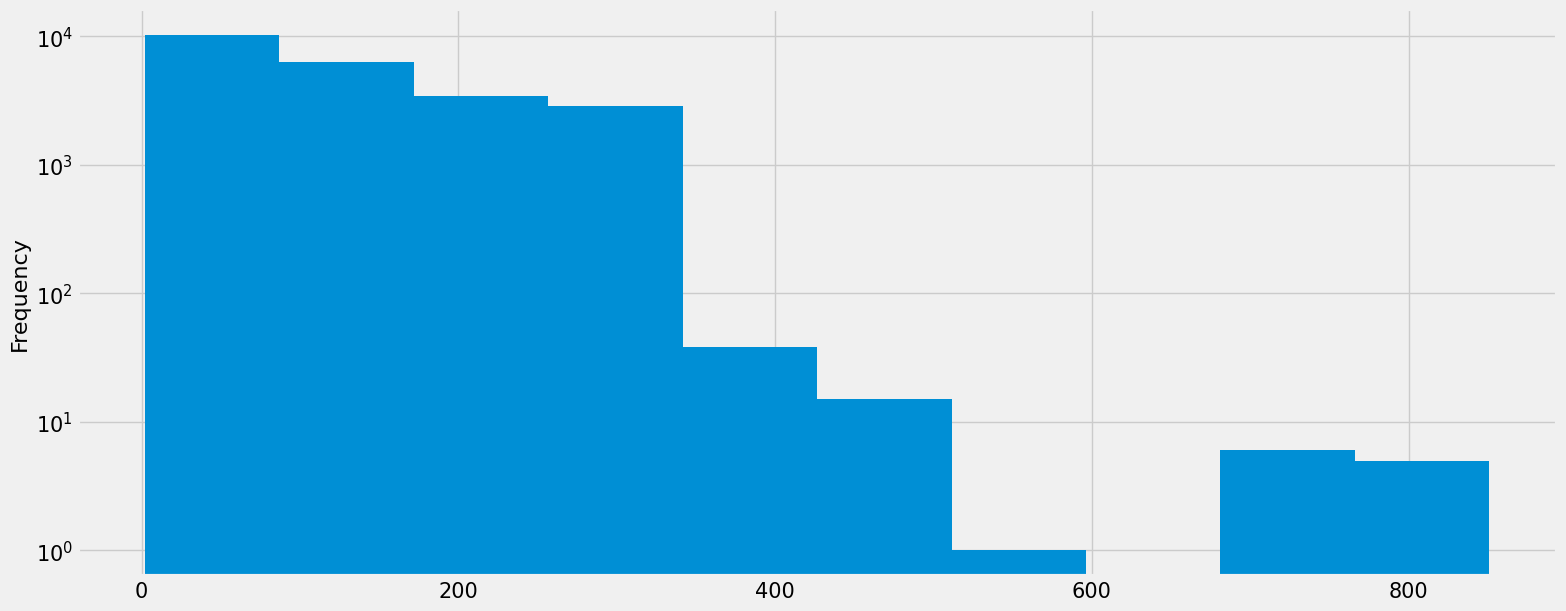

In [ ]:
df['length_parent_tweet'].plot(bins=10, kind='hist', figsize = (17,7), log=True)
plt.show();

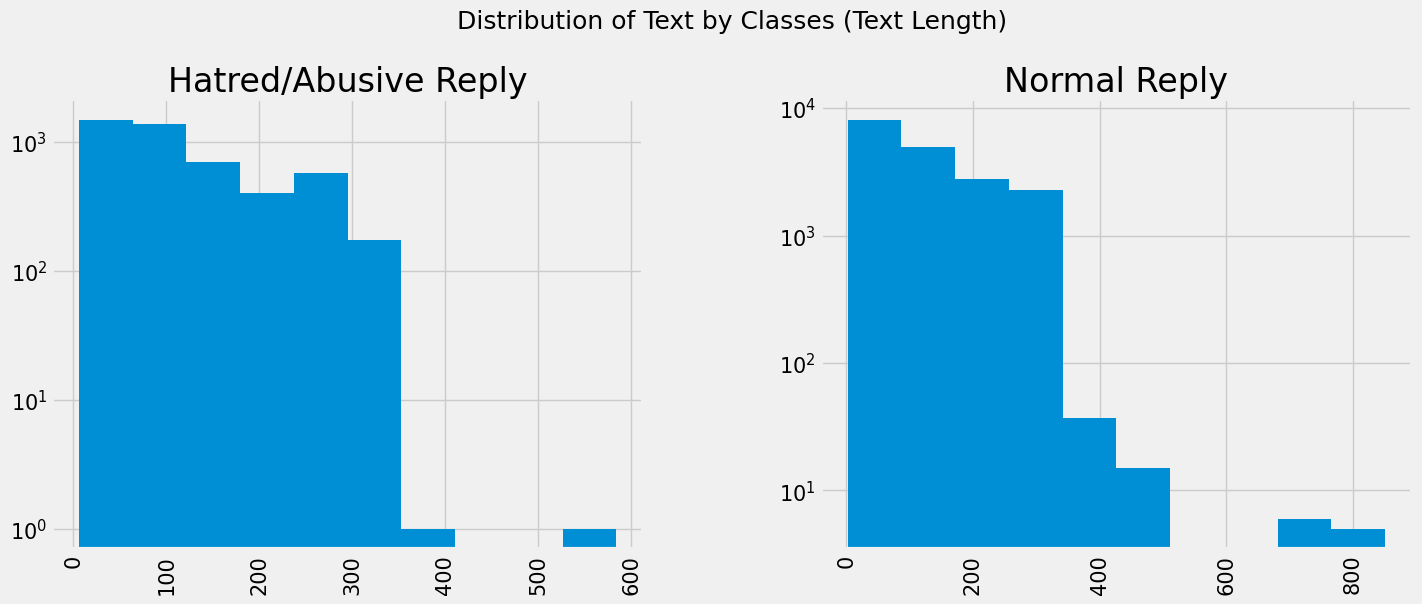

In [ ]:
df.hist(column='length_parent_tweet', by='Hatred/Abusive', bins=10,figsize=(17,6), log=True)
plt.suptitle('Distribution of Text by Classes (Text Length)', fontsize = 18, y = 1.05)
plt.show();

### Remove Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    removed = []

    stop_words = nltk.corpus.stopwords.words('english')
    new_words=('re','name', 'user', 'ct', 'us','ud', 'ua', 'ut', 'amp', 'uc', 'ue', 'uk', 'it', 'im', 'ut', 'see', 'nonenonefalsefalse')
    for i in new_words:
        stop_words.append(i)
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].apply(remove_stopwords)
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].apply(remove_stopwords)

## Remove special characters from string </>/$/@/$ etc

In [ ]:
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].str.replace('\W', ' ')
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].str.replace('\W', ' ')

## Remove single letter words and white dtrips characters from string

In [ ]:
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
df['cleaned_DirectReply'] = df['cleaned_ParentTweet'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score        Hatred/Abusive  length_parent_tweet  length_direct_reply
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44    wanted photo yemin couple one real couple yemin    wanted photo yemin couple one real couple yemin  one and onli  the best coupl reyem ozgok yemin...  @idabaes One and only;  the best couple ReyEm ...          0.0               0.000000         0.0              0.000000         1.0              0.041667          Normal Reply                  147                  139
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  schizophrenics say photos ol sorry delude phot...  schizophrenics say photos ol sorry delude phot...  whatz their bloodi prblm let just agre with th...  @idabaes Whatz their bloody prblm? Let's just ...          1.0               0.020408         3.0              0.061224         0.0              0.000000  Hatred/Abusive Reply                  131                  312
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4                        prideless woman stupid fans                        prideless woman stupid fans  enough is enough this woman should line up wit...  @idabaes @cansutuman enough is enough; this wo...          0.0               0.000000         1.0              0.010870         4.0              0.043478          Normal Reply                   85                  585
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  parsite still alive kmow well afraid turkish m...  parsite still alive kmow well afraid turkish m...  shes inde a real witch  look at her  she say y...  @idabaes She's indeed a real witch 🤮 look at h...          0.0               0.000000         4.0              0.056338         4.0              0.056338  Hatred/Abusive Reply                  185                  404
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2             please report ig spam sick mind people             please report ig spam sick mind people                    hesabı kapanmış mi çıkmadı bend   @idabaes @Fatma Hesabı kapanmış mi çıkmadı bende          0.0               0.000000         0.0              0.000000         0.0              0.000000          Normal Reply                   78                   57

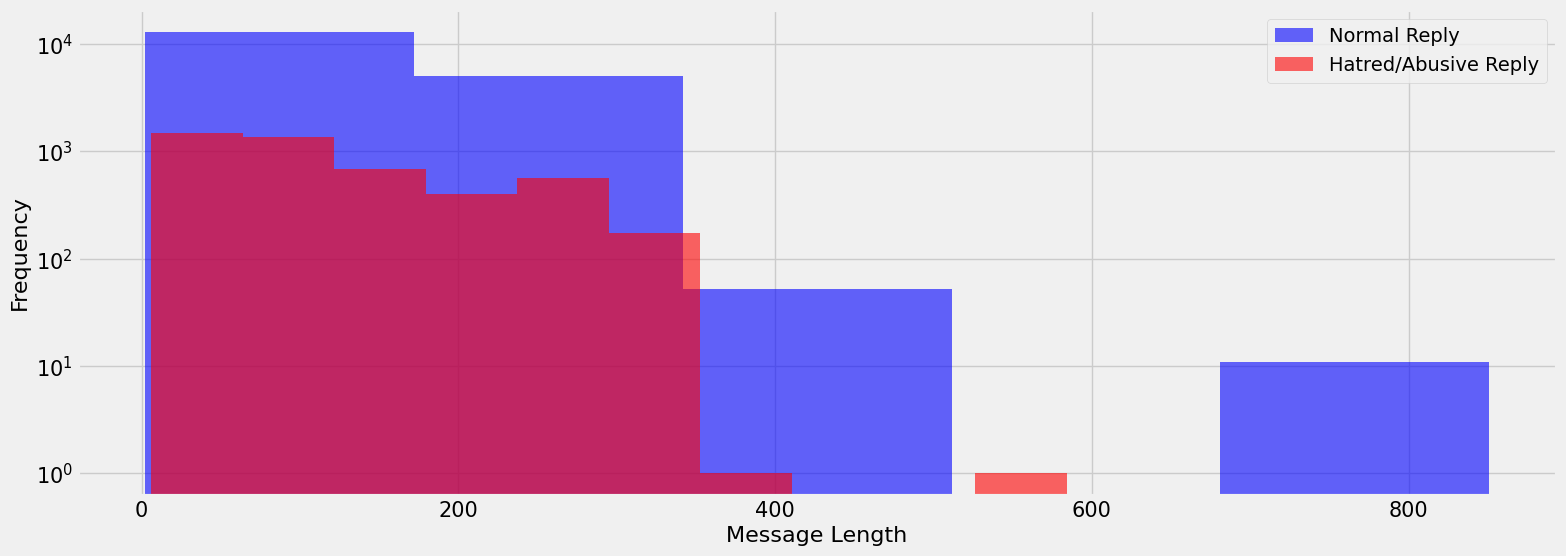

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.figure(figsize=(17, 6))

df[df['Hatred/Abusive']=='Normal Reply'].length_parent_tweet.plot(bins=5, kind='hist', color='blue',
                                       label='Normal Reply', alpha=0.6, log=True)
df[df['Hatred/Abusive']=='Hatred/Abusive Reply'].length_parent_tweet.plot(kind='hist', color='red',
                                       label='Hatred/Abusive Reply', alpha=0.6, log=True)

plt.legend()
plt.xlabel("Message Length")
plt.show();

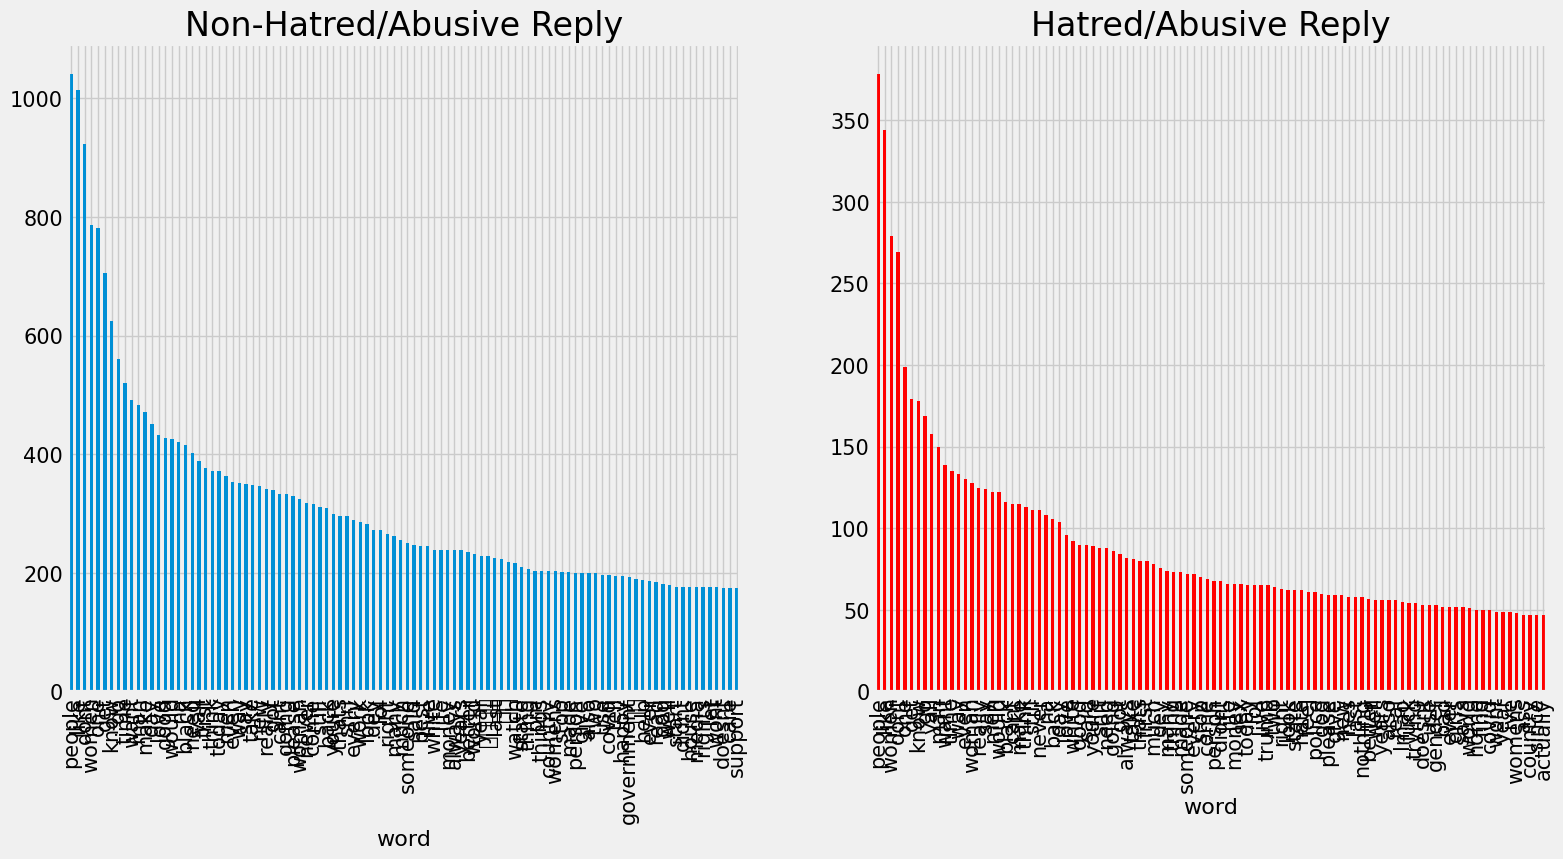

In [ ]:
from collections import Counter
normal_reply_ct  = Counter(" ".join(df[df['Hatred/Abusive']=='Normal Reply']["cleaned_ParentTweet"]).split()).most_common(100)
hatred_abusive_reply_ct = Counter(" ".join(df[df['Hatred/Abusive']=='Hatred/Abusive Reply']["cleaned_ParentTweet"]).split()).most_common(100)
df_normal_reply = pd.DataFrame.from_dict(normal_reply_ct)
df_normal_reply = df_normal_reply.rename(columns={0: "word", 1 : "count"})
df_hatred_abusive_reply = pd.DataFrame.from_dict(hatred_abusive_reply_ct)
df_hatred_abusive_reply = df_hatred_abusive_reply.rename(columns={0: "word", 1 : "count"})

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
df_normal_reply.plot.bar(x='word', y='count', legend=False, ax=axes[0])
df_hatred_abusive_reply.plot.bar(x='word', y='count', color='red', legend=False, ax=axes[1])

axes[0].set_title('Non-Hatred/Abusive Reply')
axes[1].set_title('Hatred/Abusive Reply')
plt.show();

### Define some helper functions

In [ ]:

class_names = ['Normal Reply', 'Hatred/Abusive Reply']

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

def evaluate_model(data_x, data_y):
    k_fold = KFold(5, shuffle=False, random_state=123)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        clf = RandomForestClassifier(criterion='entropy',max_depth=20,max_features='auto',n_estimators=100)
        # Fit the classifier
        classifier = clf.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cnf_matrix


def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].apply(lambda x: remove_numbers(x))
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].apply(lambda x: remove_extra_white_spaces(x))
df['cleaned_ParentTweet'] = df['cleaned_ParentTweet'].apply(lambda x: lemmatizing(x))
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].apply(lambda x: remove_numbers(x))
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].apply(lambda x: remove_extra_white_spaces(x))
df['cleaned_DirectReply'] = df['cleaned_DirectReply'].apply(lambda x: lemmatizing(x))
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score        Hatred/Abusive  length_parent_tweet  length_direct_reply
1  Who wanted a photo from yemin couple ? 🤭  the ...  @idabaes1 One and only;  the best couple ReyEm...               False                     False                         1                         44    wanted photo yemin couple one real couple yemin    wanted photo yemin couple one real couple yemin  one and onli  the best coupl reyem ozgok yemin...  @idabaes One and only;  the best couple ReyEm ...        0.000                  0.000       0.000                 0.000       1.000                 0.042          Normal Reply                  147                  139
4  for schizophrenics who say the photos are old;...  @idabaes1 Whatz their bloody prblm? Let's just...               False                     False                         1                         24  schizophrenic say photo ol sorry delude photo ...  schizophrenic say photo ol sorry delude photo ...  whatz their bloodi prblm let just agre with th...  @idabaes Whatz their bloody prblm? Let's just ...        1.000                  0.020       3.000                 0.061       0.000                 0.000  Hatred/Abusive Reply                  131                  312
5  Prideless woman with stupid fans @cansutuman #...  @idabaes1 @cansutuman enough is enough; this w...               False                     False                         1                          4                         prideless woman stupid fan                         prideless woman stupid fan  enough is enough this woman should line up wit...  @idabaes @cansutuman enough is enough; this wo...        0.000                  0.000       1.000                 0.011       4.000                 0.043          Normal Reply                   85                  585
6  This parsite  is still alive ? 🤣   i kmow you ...  @idabaes1 She's indeed a real witch 🤮 look at ...               False                     False                         1                          6  parsite still alive kmow well afraid turkish m...  parsite still alive kmow well afraid turkish m...  shes inde a real witch  look at her  she say y...  @idabaes She's indeed a real witch 🤮 look at h...        0.000                  0.000       4.000                 0.056       4.000                 0.056  Hatred/Abusive Reply                  185                  404
7  Please report those ig as spam 👇👇. Sick mind p...  @idabaes1 @Fatma94653134 Hesabı kapanmış mi çı...                True                     False                         2                          2             please report ig spam sick mind people             please report ig spam sick mind people                    hesabı kapanmış mi çıkmadı bend   @idabaes @Fatma Hesabı kapanmış mi çıkmadı bende        0.000                  0.000       0.000                 0.000       0.000                 0.000          Normal Reply                   78                   57

## Most common words used for Hatred/Abusive Replies

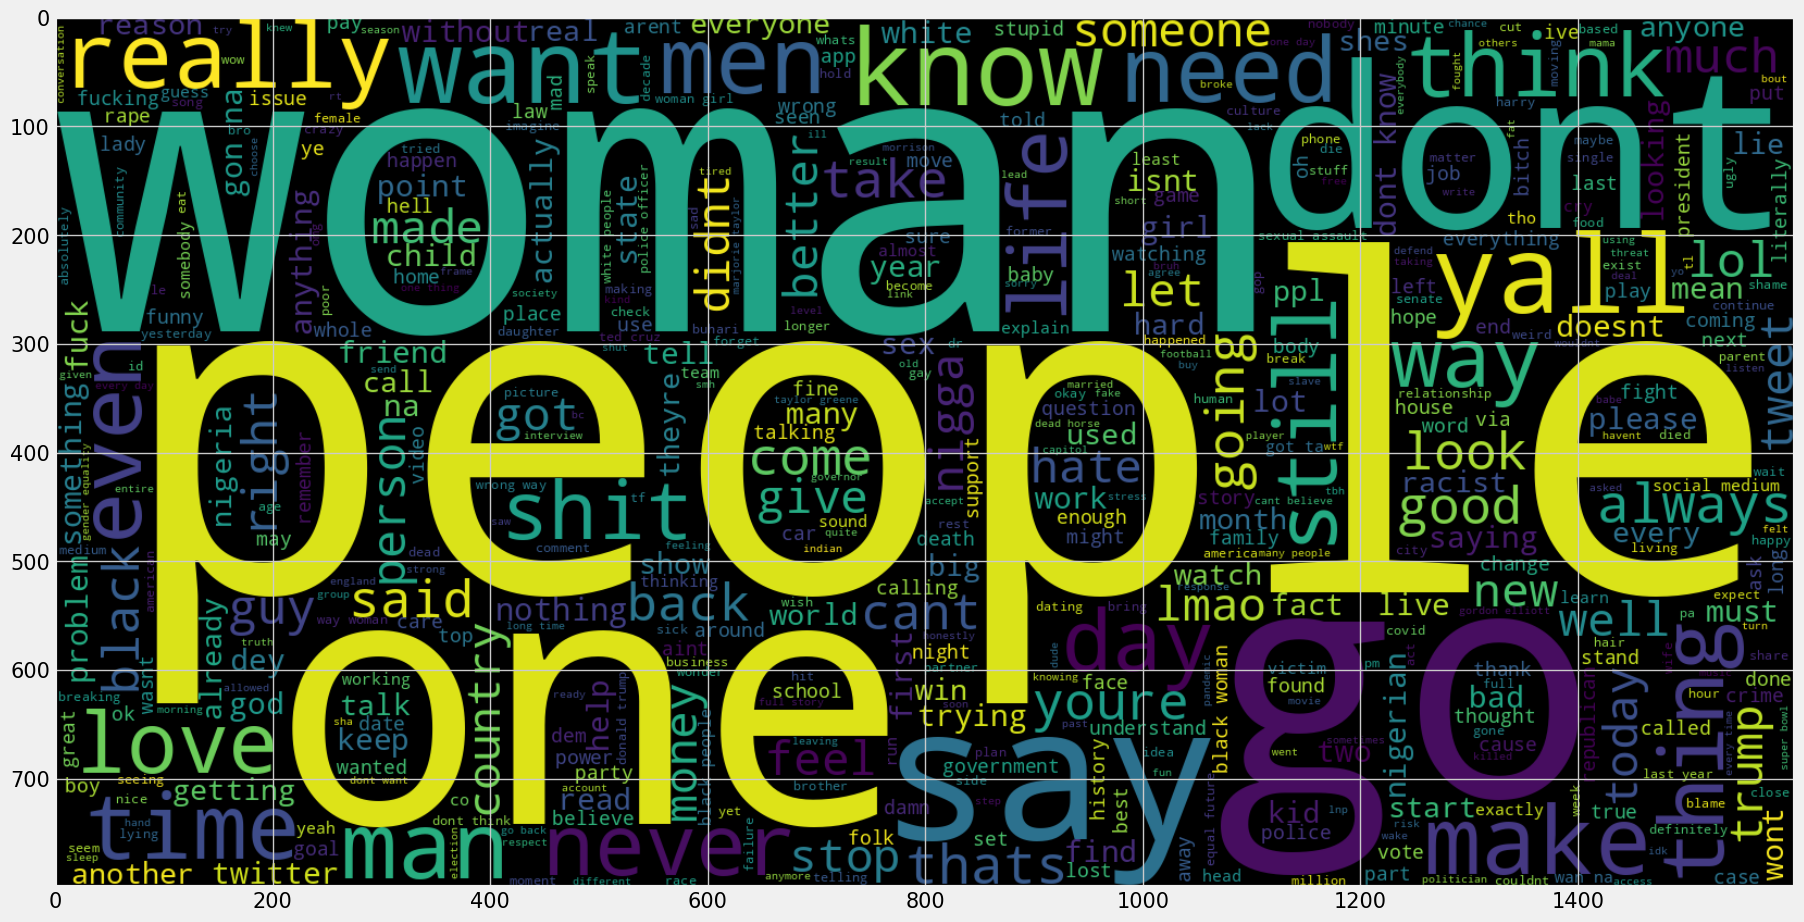

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(pd.concat([df[df['Hatred/Abusive']== 'Hatred/Abusive Reply'].cleaned_ParentTweet, df[df['Hatred/Abusive']== 'Hatred/Abusive Reply'].cleaned_DirectReply])))
plt.imshow(wc , interpolation = 'bilinear')
plt.show();

## Most common words used for Normal Replies

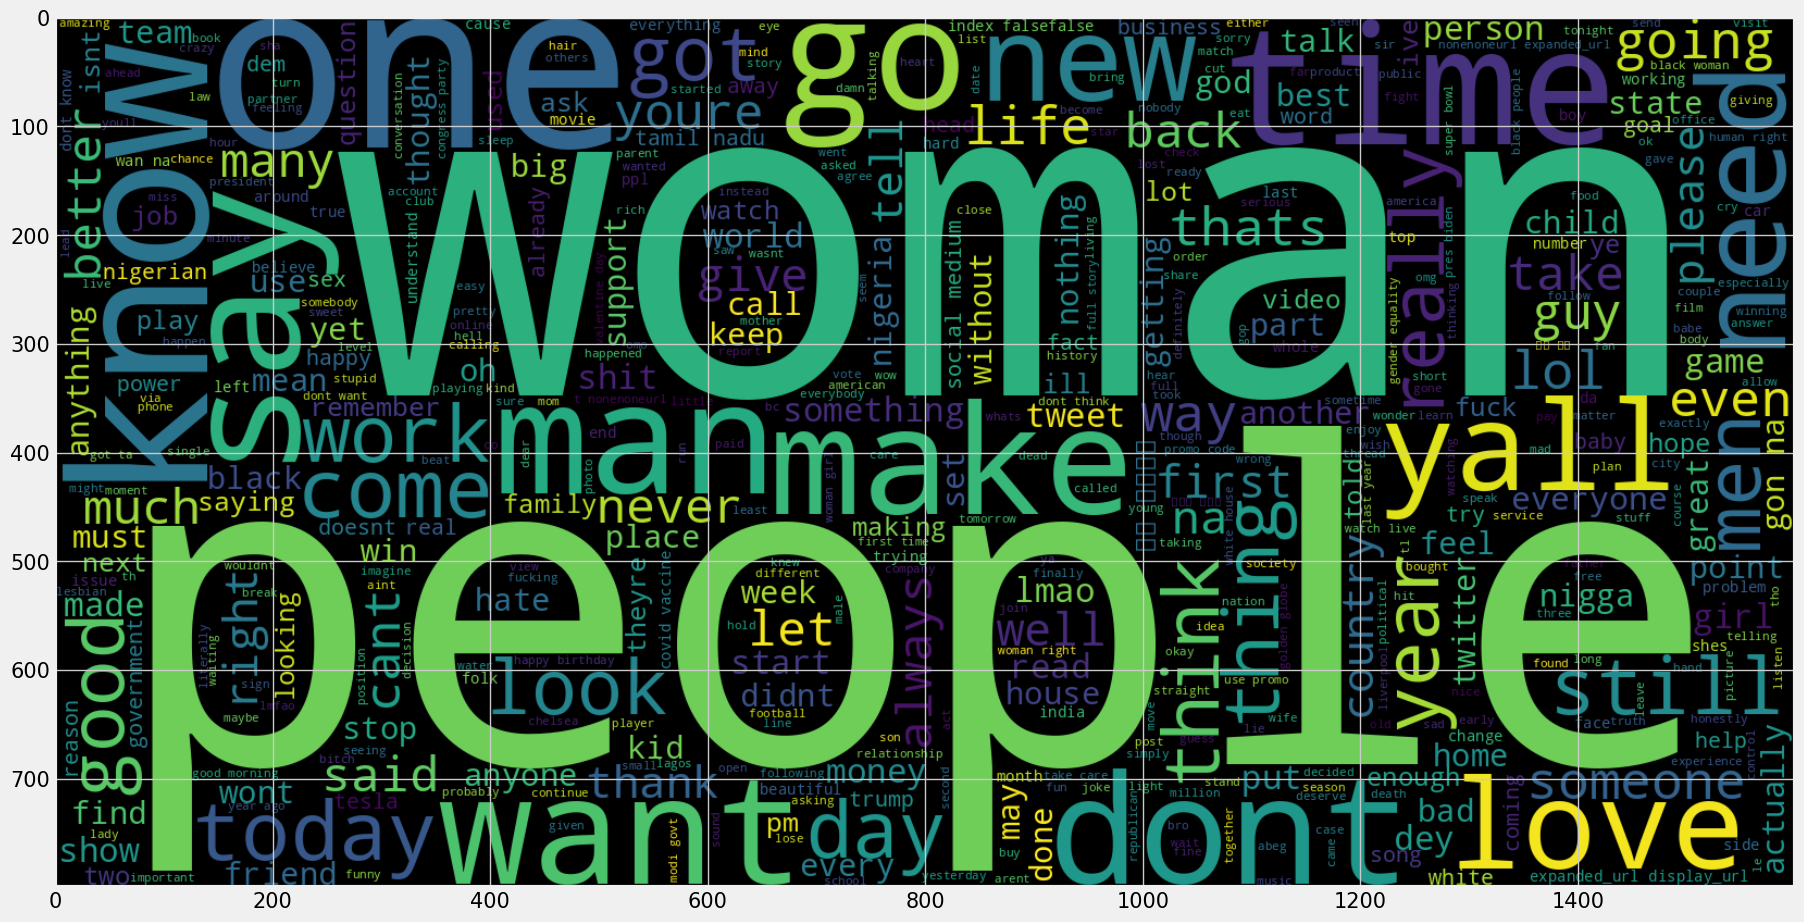

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(pd.concat([df[df['Hatred/Abusive']== 'Normal Reply'].cleaned_ParentTweet, df[df['Hatred/Abusive']== 'Normal Reply'].cleaned_DirectReply])))
plt.imshow(wc , interpolation = 'bilinear')
plt.show();

In [ ]:
df['Hatred/Abusive'] = df['Hatred/Abusive'].replace({'Hatred/Abusive Reply':1,'Normal Reply':0})

In [ ]:
df = df.sample(frac = 1.0)

In [ ]:
df.reset_index(drop = True, inplace= True)

In [ ]:
df.head()

ParentTweet                                        DirectReply Parent quote status Parent possibly sensitive Parent tweet num retweets Parent tweet num favorites                                cleaned_ParentTweet                                cleaned_DirectReply                                            stemmed                                          char_stem  hate_counts  hate_normalised_score  neg_counts  neg_normalised_score  pos_counts  pos_normalised_score  Hatred/Abusive  length_parent_tweet  length_direct_reply
0   https://t.co/Jhm2krcaCH https://t.co/dihQrC5g10   @JusttLit So tragic they have sold everything ...                True                     False                         0                          1                                                                                                        so tragic they have sold everyth my sister you...  @JusttLit So tragic they have sold everything ...        0.000                  0.000       1.000                 0.071       1.000                 0.071               1                   48                   87
1  Alex Smith; who is transitioning from male to ...  @WomenReadWomen And am I supposed to care or f...               False                     False                        30                         78  alex smith transitioning male female formally ...  alex smith transitioning male female formally ...  and am i suppos to care or feel sorri for this...  @WomenReadWomen And am I supposed to care or f...        0.000                  0.000       3.000                 0.022       3.000                 0.022               0                  247                  889
2  Also; to those of you who are going to counter...  @ebelee_ There's a counter protest in the work...               False                     False                       191                        269  also going counter protest saturday stand yout...  also going counter protest saturday stand yout...          there a counter protest in the work  amen  @ebelee_ There's a counter protest in the work...        0.000                  0.000       1.000                 0.111       1.000                 0.111               1                  247                   63
3      Let's get sensual. 🌹 https://t.co/nxP8yms9ni                              @BobbyAdore Smart Guy.               False                      True                         1                          8                                    let get sensual                                    let get sensual                                          smart guy                             @BobbyAdore Smart Guy.        0.000                  0.000       0.000                 0.000       1.000                 0.500               0                   45                   22
4  There has always been an incompatibility betwe...  @aniobrien yes - it is amazing how blind we ar...               False                     False                         4                         54  always incompatibility cultural relativism fem...  always incompatibility cultural relativism fem...  yes  it is amaz how blind we are to the regres...  @aniobrien yes - it is amazing how blind we ar...        0.000                  0.000       8.000                 0.108       3.000                 0.041               1                  167                  516

In [ ]:
df.to_csv('Processed_df_final_exp_2_1.csv', index = False)

In [ ]:
df = pd.read_csv('Processed_df_final_exp_3_3.csv')
df.columns

Index(['ParentTweet', 'Parent tweet place', 'Parent tweet geo location', 'Parent tweet hashtags', 'Parent tweet symbols', 'Parent tweet user mentions', 'Parent tweet URLs', 'Parent quote status', 'Parent possibly sensitive', 'Parent tweet num retweets', 'Parent tweet num favorites', 'UserId', 'location', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'DirectReply', 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count', 'Parent_Average Word Length', 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count', 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count', 'Parent_Average Sentence Length', 'Parent_Positive Sentiment Score', 'Parent_Negative Sentiment Score',
 

In [ ]:
df = pd.read_csv('Processed_df_final_exp_3_3.csv')
df.columns

# Replace any non-boolean values in "Parent quote status" column
df["Parent quote status"] = df["Parent quote status"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Replace any non-boolean values in "Parent possibly sensitive" column
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Convert the columns to category data type
df["Parent quote status"] = df["Parent quote status"].astype("category")
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].astype("category")

df = df.replace({True: 1, False: 0})
df = df.replace({'True': 1, 'False': 0})
df = df.replace({'Yes': 1, 'No': 0})

In [ ]:
meta_features = ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified',
                 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled',
                 'has_extended_profile', 'default_profile', 'default_profile_image', 'following',
                 'follow_request_sent', 'notifications',

                 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count',
                 'Parent_Average Word Length',
                 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count',
                 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count',
                 'Parent_Average Sentence Length', 'DirectReply_Word Count', 'DirectReply_Character Count',
                 'DirectReply_Sentence Count', 'DirectReply_Average Word Length', 'DirectReply_Stopword Count',
                 'DirectReply_Hashtag Count', 'DirectReply_Mention Count', 'DirectReply_URL Count',
                 'DirectReply_Capitalized Word Count', 'DirectReply_Punctuation Count',
                 'DirectReply_Average Sentence Length'
                  ]

target_features = df['Hatred/Abusive']
metaDF = df[meta_features]
metaDF.head()

followers_count  friends_count  listed_count  favourites_count  geo_enabled  verified  statuses_count  contributors_enabled  is_translator  is_translation_enabled  has_extended_profile  default_profile  default_profile_image  following  follow_request_sent  notifications  Parent_Word Count  Parent_Character Count  Parent_Sentence Count  Parent_Average Word Length  Parent_Stopword Count  Parent_Hashtag Count  Parent_Mention Count  Parent_URL Count  Parent_Capitalized Word Count  Parent_Punctuation Count  Parent_Average Sentence Length  DirectReply_Word Count  DirectReply_Character Count  DirectReply_Sentence Count  DirectReply_Average Word Length  DirectReply_Stopword Count  DirectReply_Hashtag Count  DirectReply_Mention Count  DirectReply_URL Count  DirectReply_Capitalized Word Count  DirectReply_Punctuation Count  DirectReply_Average Sentence Length
0        7710400.0         2410.0        2409.0            1298.0            0         1         85530.0                     0              0                       0                     0                0                      0          0                    0              0               51.0                   302.0                    1.0                    5.000000                    0.0                   1.0                   0.0               2.0                            0.0                      12.0                       51.000000                   547.0                       2866.0                        17.0                         4.458867                        54.0                       11.0                       42.0                   16.0                                21.0                          217.0                            32.176471
1         270178.0           74.0         141.0             112.0            1         0          1017.0                     0              0                       0                     0                1                      0          0                    0              0               26.0                   143.0                    3.0                    4.769231                    6.0                   1.0                   0.0               1.0                            1.0                      12.0                        8.666667                   688.0                       3809.0                        33.0                         4.716570                       224.0                       11.0                       62.0                    2.0                                19.0                          152.0                            20.848485
2        2561864.0       247972.0       17533.0            1198.0            1         1        319703.0                     0              0                       0                     0                0                      0          0                    0              0               60.0                   267.0                    2.0                    3.833333                   17.0                   2.0                   0.0               2.0                            0.0                      24.0                       30.000000                    26.0                        122.0                         2.0                         3.884615                        11.0                        1.0                        1.0                    0.0                                 2.0                            6.0                            13.000000
3             97.0          174.0           0.0             303.0            0         0          4427.0                     0              0                       0                     1                1                      0          0                    0              0               37.0                   222.0                    1.0                    5.378378                    4.0                  12.0                   0.0               1.0                            0.0                      18.0                       37.000

In [ ]:
import pandas as pd

def transform_dataframe(df):
    transformed_df = pd.DataFrame()

    for column in df.columns:
        if df[column].dtype == 'object':
            if len(df[column].unique()) == 2:
                if df[column].nunique() == 2 and set(df[column].unique()) == set(['true', 'false']):
                    transformed_df[column] = df[column].map({'true': 1, 'false': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['True', 'False']):
                    transformed_df[column] = df[column].map({'True': 1, 'False': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set([True, False]):
                    transformed_df[column] = df[column].map({True: 1, False: 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['Yes', 'No']):
                    transformed_df[column] = df[column].map({'Yes': 1, 'No': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['yes', 'no']):
                    transformed_df[column] = df[column].map({'yes': 1, 'no': 0})
                else:
                    transformed_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            else:
                transformed_df[column] = df[column]
        else:
            transformed_df[column] = (df[column] - df[column].mean()) / df[column].std()

    transformed_df = transformed_df.loc[:, transformed_df.nunique() > 1]

    return transformed_df
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df['cleaned_ParentTweet']
y = df['Hatred/Abusive']

In [ ]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df['cleaned_ParentTweet']
y = df['Hatred/Abusive']

In [ ]:
print('Shape of Features : ', X.shape)
print('Shape of labels : ', y.shape)

Shape of Features :  (5840,)
Shape of labels :  (5840,)


## Modelling

In [ ]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter


from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, metaDF_train, metaDF_test = train_test_split(X, y, metaDF, random_state=1, test_size = 0.3, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088,)
(1752,)
(4088,)
(1752,)


In [ ]:
metaDF_train = transform_dataframe(metaDF_train)
metaDF_test = transform_dataframe(metaDF_test)

In [ ]:
Counter(y_train)

Counter({0: 3639, 1: 449})

In [ ]:
Counter(y_test)

Counter({1: 192, 0: 1560})

## Bag of Words

---

In [ ]:
# instantiate the vectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_train.fillna('', inplace=True)  # Replace NaN values with empty string
X_test.fillna('', inplace=True)  # Replace NaN values with empty string
vect = CountVectorizer(lowercase=True,  stop_words='english',ngram_range=(1, 2), max_features=5000)
vect.fit(X_train)
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

In [ ]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
# examine the document-term matrix
X_train_dtm

<4088x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 73841 stored elements in Compressed Sparse Row format>

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1752x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 29196 stored elements in Compressed Sparse Row format>

In [ ]:
Counter(y_train)

Counter({0: 3639, 1: 449})

In [ ]:
Counter(y_test)

Counter({1: 192, 0: 1560})

In [ ]:
X_train = X_train_dtm.toarray()
X_test = X_test_dtm.toarray()

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [ ]:
X_train = np.hstack((X_train, metaDF_train.values))
X_test = np.hstack((X_test, metaDF_test.values))

smt = ADASYN (sampling_strategy='minority')
X_train, y_train = smt.fit_resample(X_train, y_train)

y_train =  y_train.values
y_test =  y_test.values

In [ ]:
X_train.shape, X_test.shape

((7295, 5032), (1752, 5032))

In [ ]:
Counter(y_train)

Counter({0: 3639, 1: 3656})

In [ ]:
Counter(y_test)

Counter({1: 192, 0: 1560})

LogisticRegression

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1560
           1       0.69      0.82      0.75       192

    accuracy                           0.94      1752
   macro avg       0.84      0.89      0.86      1752
weighted avg       0.95      0.94      0.94      1752


 confussion matrix:
 [[1490   70]
 [  34  158]]




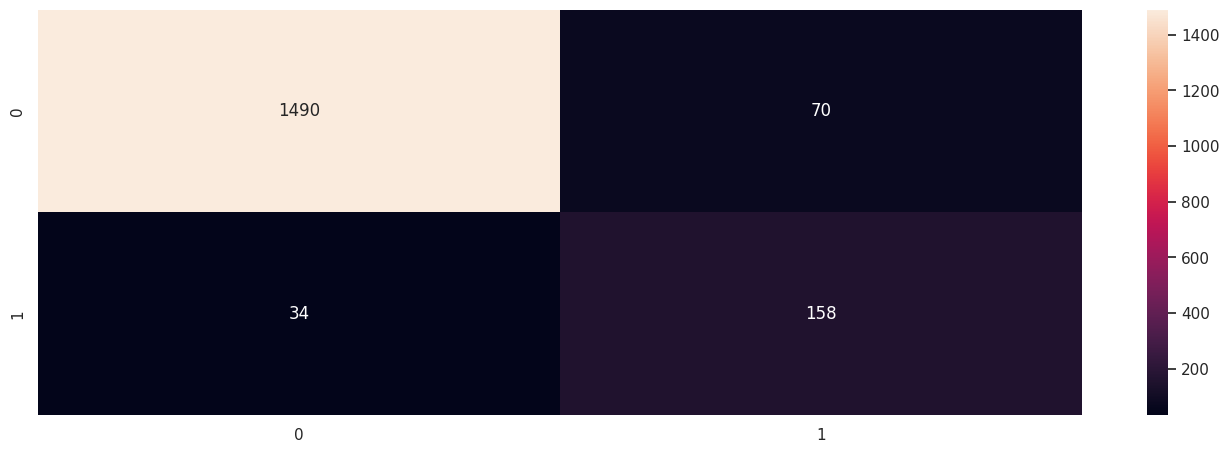

Decision Tree

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1560
           1       0.37      0.72      0.49       192

    accuracy                           0.83      1752
   macro avg       0.66      0.78      0.69      1752
weighted avg       0.90      0.83      0.85      1752


 confussion matrix:
 [[1319  241]
 [  53  139]]




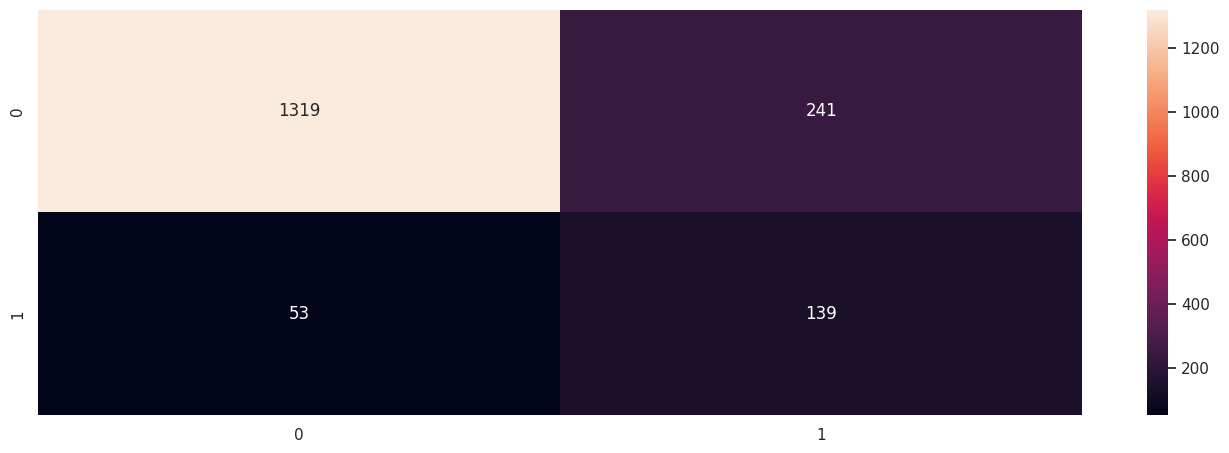

Gaussian NB

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1560
           1       0.55      0.82      0.66       192

    accuracy                           0.91      1752
   macro avg       0.76      0.87      0.80      1752
weighted avg       0.93      0.91      0.91      1752


 confussion matrix:
 [[1432  128]
 [  35  157]]




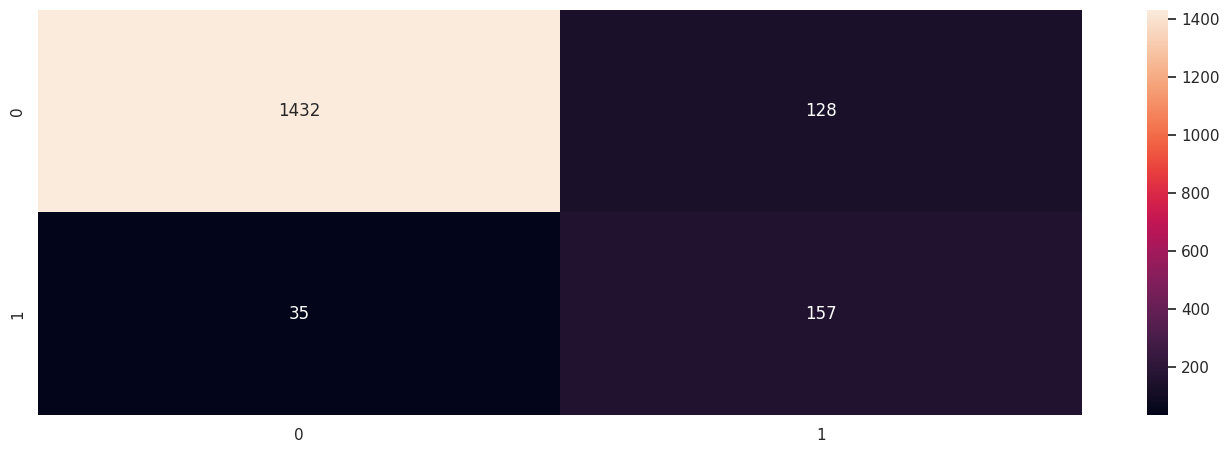

===
SVM
===

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1560
           1       0.73      0.80      0.76       192

    accuracy                           0.95      1752
   macro avg       0.85      0.88      0.87      1752
weighted avg       0.95      0.95      0.95      1752


 confussion matrix:
 [[1502   58]
 [  38  154]]




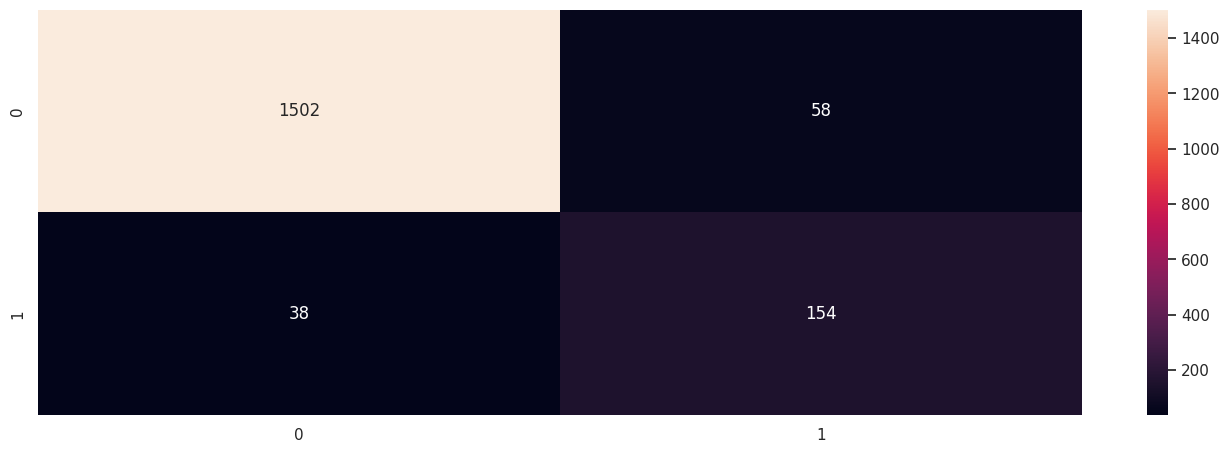

Random Forest

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1560
           1       0.71      0.83      0.77       192

    accuracy                           0.94      1752
   macro avg       0.85      0.89      0.87      1752
weighted avg       0.95      0.94      0.95      1752


 confussion matrix:
 [[1496   64]
 [  33  159]]




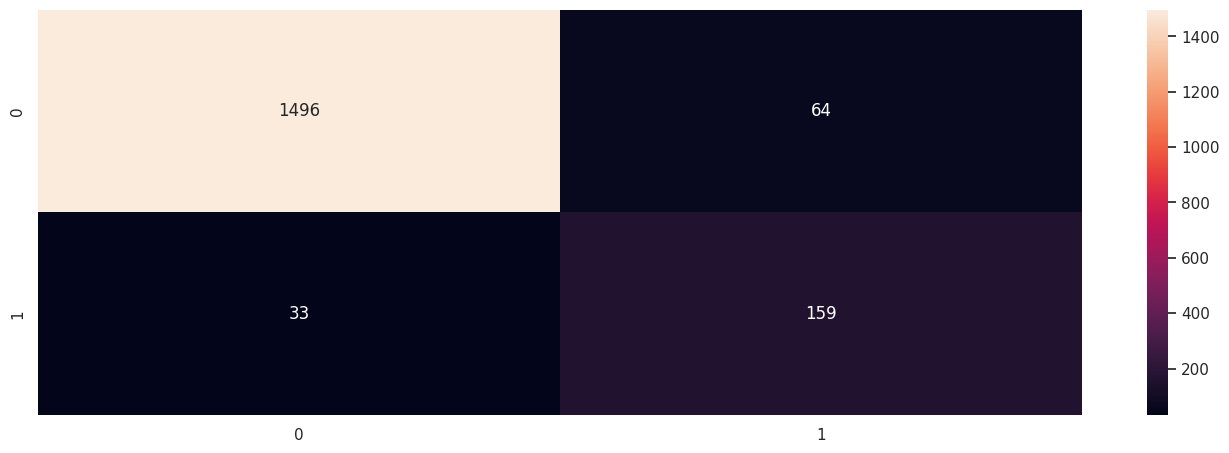

AdaBoost

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1560
           1       0.40      0.75      0.52       192

    accuracy                           0.85      1752
   macro avg       0.68      0.80      0.71      1752
weighted avg       0.90      0.85      0.87      1752


 confussion matrix:
 [[1341  219]
 [  48  144]]




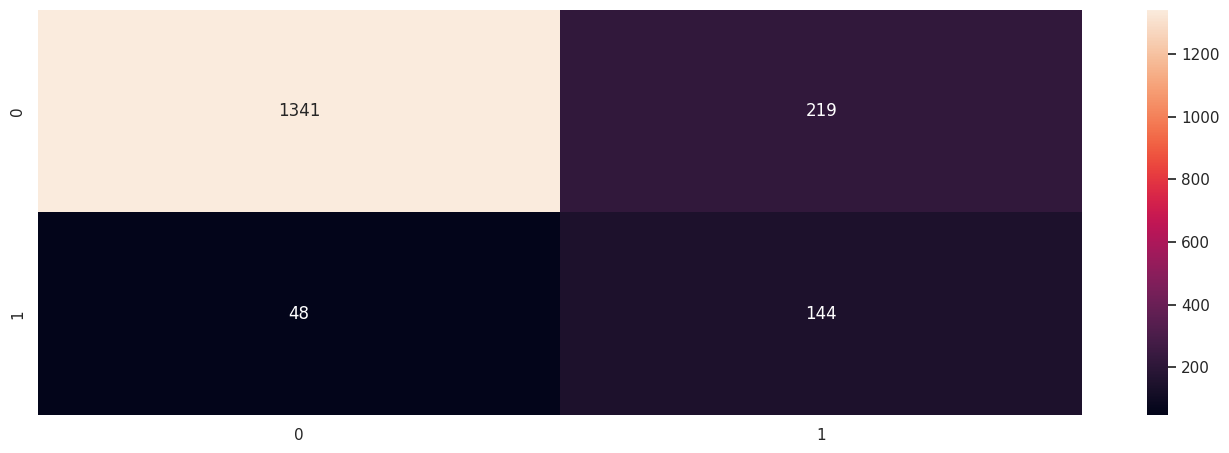

Extra Trees

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1560
           1       0.86      0.78      0.82       192

    accuracy                           0.96      1752
   macro avg       0.92      0.88      0.90      1752
weighted avg       0.96      0.96      0.96      1752


 confussion matrix:
 [[1536   24]
 [  42  150]]




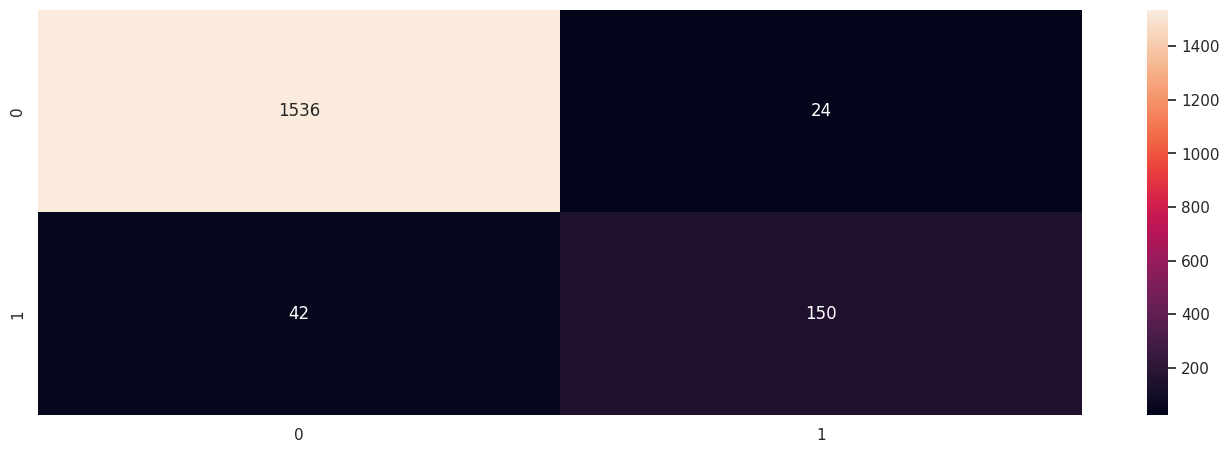

In [ ]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
specificity = []
loss_log = []
roc= []
cohen_kappa = []
mcc = []

random_state = 2

models = ["LogisticRegression",
          "Decision Tree",
          "Gaussian NB",
          "SVM",
          "Random Forest",
          "AdaBoost",
          "Extra Trees"]

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(SVC(kernel = 'linear', random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
classifiers.append(ExtraTreesClassifier(random_state=random_state))


for classifier, model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction,))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')
    CM = confusion_matrix(y_test, prediction)
    sns.heatmap(CM, annot=True, fmt='d')
    plt.show()

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Specificity = TN/(TN+FP)
    specificity.append(Specificity)

    Loss_log = metrics.log_loss(y_test, prediction)
    loss_log.append(Loss_log)

    ROC=metrics.roc_auc_score(y_test, prediction)
    roc.append(ROC)

    Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
    cohen_kappa.append(Cohen_Kappa)

    MCC = metrics.matthews_corrcoef(y_test, prediction)
    mcc.append(MCC)

In [ ]:
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log
scoreDF.set_index("Model")

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  Specificity  Matthew Correlation Coefficient  Cohen Kappa  ROC Score  Loss Log
Model                                                                                                                                                           
LogisticRegression        0.986018       0.940639   0.692982  0.822917  0.752381     0.955128                         0.722367     0.718940   0.889022  2.139578
Decision Tree             1.000000       0.832192   0.365789  0.723958  0.486014     0.845513                         0.431634     0.398419   0.784736  6.048421
Gaussian NB               0.960521       0.906963   0.550877  0.817708  0.658281     0.917949                         0.622660     0.606788   0.867829  3.353376
SVM                       0.992186       0.945205   0.726415  0.802083  0.762376     0.962821                         0.732641     0.731494   0.882452  1.974995
Random Forest             1.000000       0.944635   0.713004  0.828125  0.766265     0.958974                         0.737711     0.735062   0.893550  1.995568
AdaBoost                  1.000000       0.847603   0.396694  0.750000  0.518919     0.859615                         0.469856     0.438413   0.804808  5.492954
Extra Trees               1.000000       0.962329   0.862069  0.781250  0.819672     0.984615                         0.799903     0.798696   0.882933  1.357809

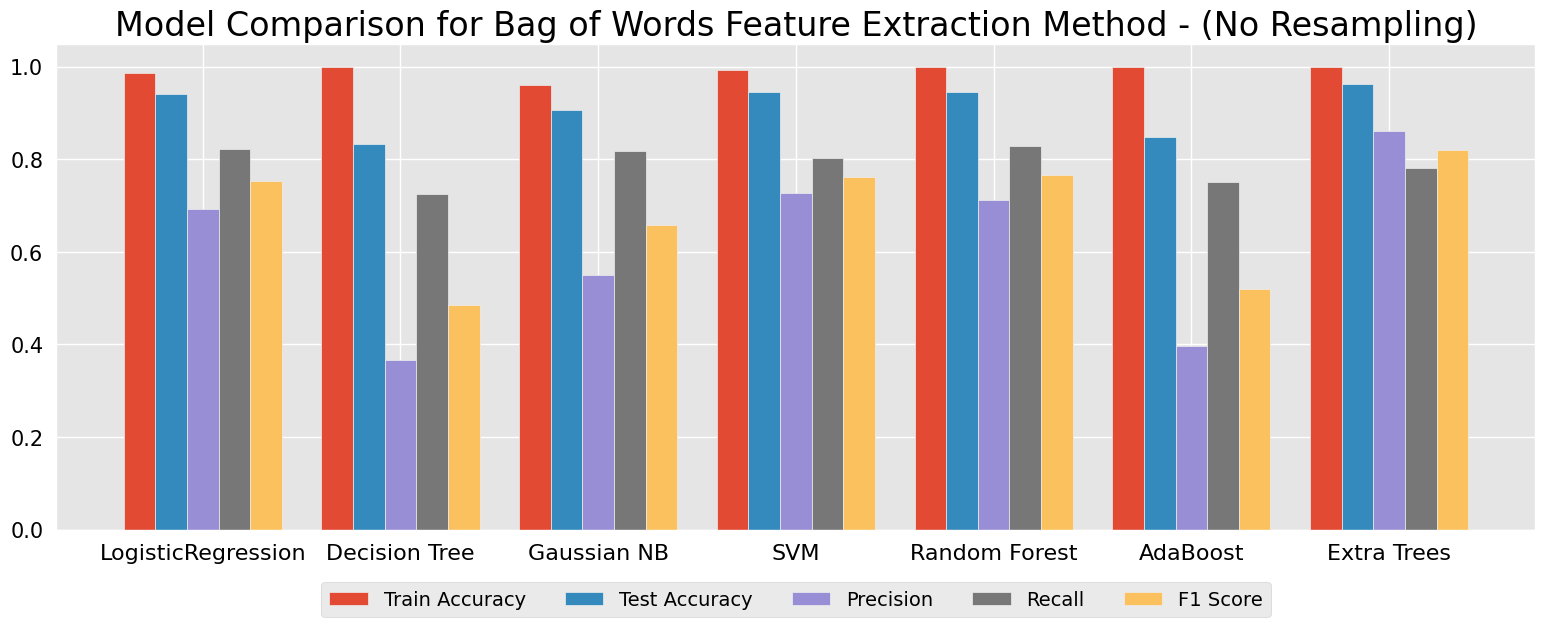

In [ ]:
plt.style.use('ggplot')

params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
         'axes.labelsize': '16',
         'axes.titlesize':'24',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'


def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", label = cols[i])


    plt.xticks(_X, X)

plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.xticks(rotation = 0, fontsize = 16)
plt.title('Model Comparison for Bag of Words Feature Extraction Method - (No Resampling)')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', ncol = 5)
#plt.legend(cols)
plt.show();

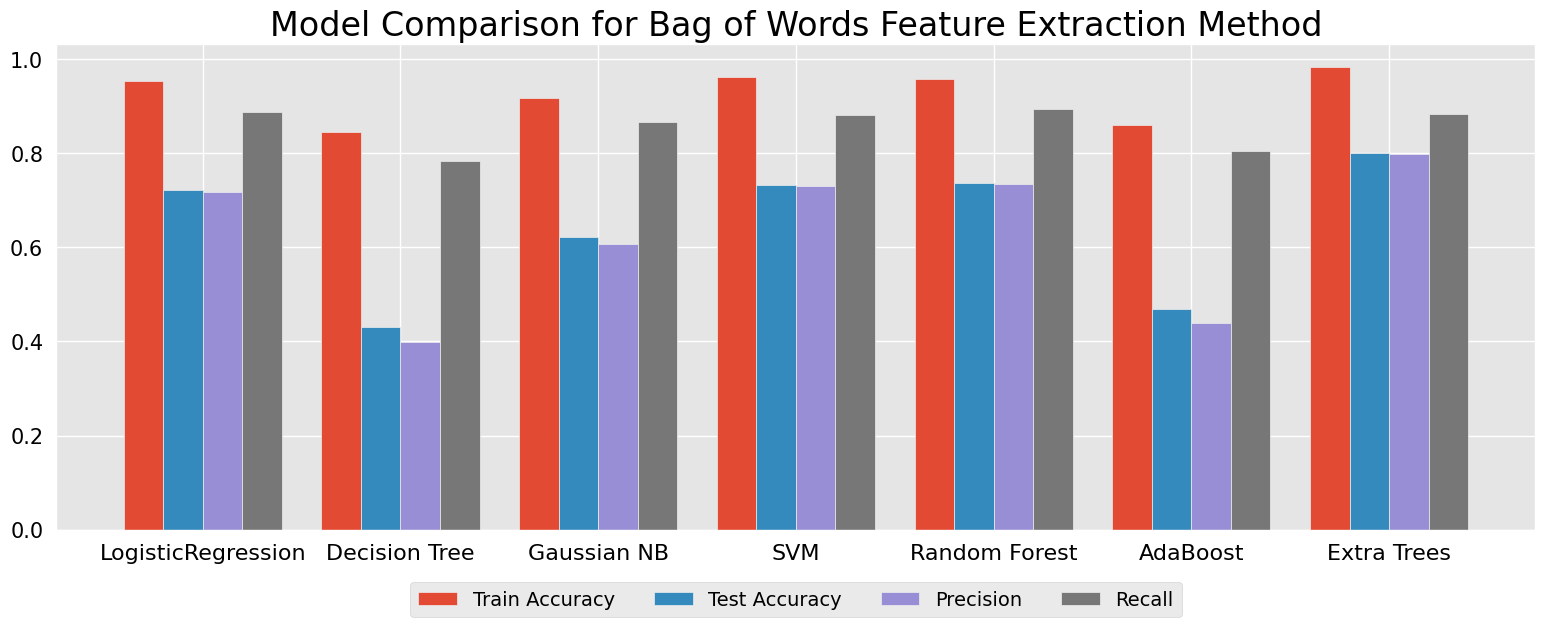

In [ ]:
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Specificity'], scoreDF['Matthew Correlation Coefficient'], scoreDF['Cohen Kappa'], scoreDF['ROC Score']])
cols = ['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score']
plt.xticks(rotation = 0, fontsize = 16)
plt.title('Model Comparison for Bag of Words Feature Extraction Method')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', ncol = 5)
plt.show();

## Tf-IDF

In [ ]:
df = pd.read_csv('Processed_df_final_exp_3_3.csv')
df.columns

# Replace any non-boolean values in "Parent quote status" column
df["Parent quote status"] = df["Parent quote status"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Replace any non-boolean values in "Parent possibly sensitive" column
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Convert the columns to category data type
df["Parent quote status"] = df["Parent quote status"].astype("category")
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].astype("category")

df = df.replace({True: 1, False: 0})
df = df.replace({'True': 1, 'False': 0})
df = df.replace({'Yes': 1, 'No': 0})

meta_features = ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified',
                 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled',
                 'has_extended_profile', 'default_profile', 'default_profile_image', 'following',
                 'follow_request_sent', 'notifications',

                 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count',
                 'Parent_Average Word Length',
                 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count',
                 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count',
                 'Parent_Average Sentence Length', 'DirectReply_Word Count', 'DirectReply_Character Count',
                 'DirectReply_Sentence Count', 'DirectReply_Average Word Length', 'DirectReply_Stopword Count',
                 'DirectReply_Hashtag Count', 'DirectReply_Mention Count', 'DirectReply_URL Count',
                 'DirectReply_Capitalized Word Count', 'DirectReply_Punctuation Count',
                 'DirectReply_Average Sentence Length'
                  ]


target_features = df['Hatred/Abusive']
metaDF = df[meta_features]


import pandas as pd

def transform_dataframe(df):
    transformed_df = pd.DataFrame()

    for column in df.columns:
        if df[column].dtype == 'object':
            if len(df[column].unique()) == 2:
                if df[column].nunique() == 2 and set(df[column].unique()) == set(['true', 'false']):
                    transformed_df[column] = df[column].map({'true': 1, 'false': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['True', 'False']):
                    transformed_df[column] = df[column].map({'True': 1, 'False': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set([True, False]):
                    transformed_df[column] = df[column].map({True: 1, False: 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['Yes', 'No']):
                    transformed_df[column] = df[column].map({'Yes': 1, 'No': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['yes', 'no']):
                    transformed_df[column] = df[column].map({'yes': 1, 'no': 0})
                else:
                    transformed_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            else:
                transformed_df[column] = df[column]
        else:
            transformed_df[column] = (df[column] - df[column].mean()) / df[column].std()

    transformed_df = transformed_df.loc[:, transformed_df.nunique() > 1]

    return transformed_df
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df['cleaned_ParentTweet']
y = df['Hatred/Abusive']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, metaDF_train, metaDF_test = train_test_split(X, y, metaDF, random_state=1, test_size = 0.3, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088,)
(1752,)
(4088,)
(1752,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X_train.fillna('', inplace=True)  # Replace NaN values with empty string
X_test.fillna('', inplace=True)  # Replace NaN values with empty string


# instantiate the vectorizer
vect = CountVectorizer(lowercase=True,  stop_words='english',ngram_range=(1, 2), max_features = 5000)
vect.fit(X_train)
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
# examine the document-term matrix
X_train_dtm

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1752x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 29196 stored elements in Compressed Sparse Row format>

In [ ]:
# Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
X_train = tfidf_transformer.transform(X_train_dtm)
X_test = tfidf_transformer.transform(X_test_dtm)

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
Counter(y_train)

Counter({0: 3639, 1: 449})

In [ ]:
Counter(y_test)

Counter({1: 192, 0: 1560})

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [ ]:
metaDF_train = transform_dataframe(metaDF_train)
metaDF_test = transform_dataframe(metaDF_test)


X_train = np.hstack((X_train, metaDF_train.values))
X_test = np.hstack((X_test, metaDF_test.values))

smt = ADASYN (sampling_strategy='minority')
X_train, y_train = smt.fit_resample(X_train, y_train)

y_train =  y_train.values
y_test =  y_test.values

LogisticRegression

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1560
           1       0.52      0.89      0.65       192

    accuracy                           0.90      1752
   macro avg       0.75      0.89      0.80      1752
weighted avg       0.93      0.90      0.91      1752


 confussion matrix:
 [[1399  161]
 [  21  171]]




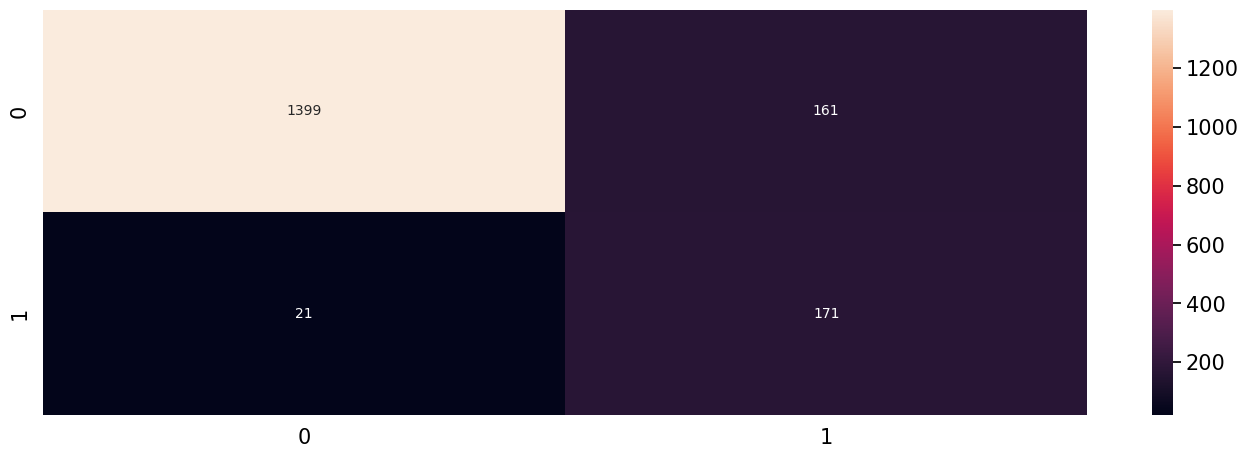

Decision Tree

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1560
           1       0.32      0.85      0.46       192

    accuracy                           0.78      1752
   macro avg       0.65      0.81      0.66      1752
weighted avg       0.90      0.78      0.82      1752


 confussion matrix:
 [[1208  352]
 [  29  163]]




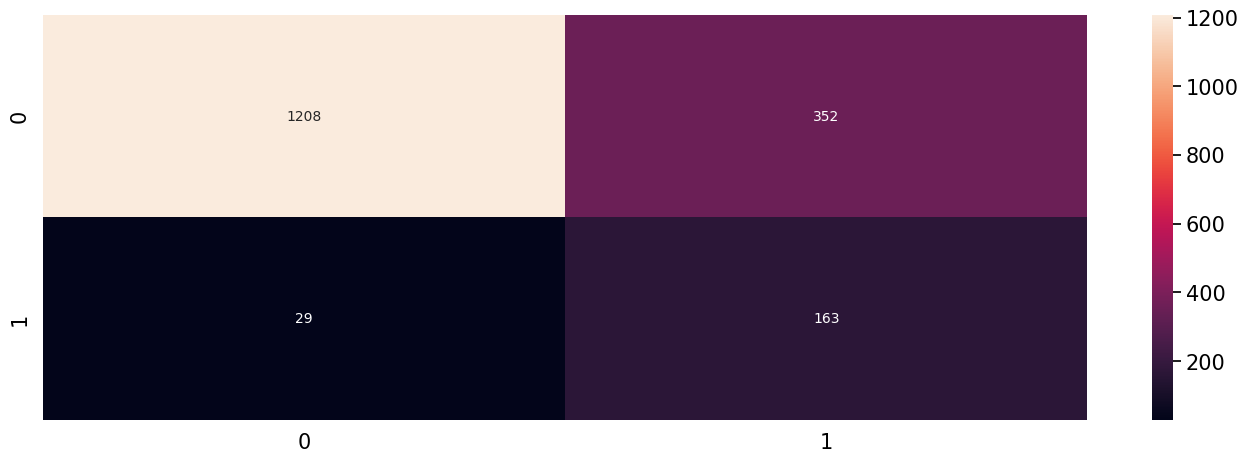

Gaussian NB

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1560
           1       0.55      0.82      0.66       192

    accuracy                           0.91      1752
   macro avg       0.76      0.87      0.80      1752
weighted avg       0.93      0.91      0.91      1752


 confussion matrix:
 [[1432  128]
 [  35  157]]




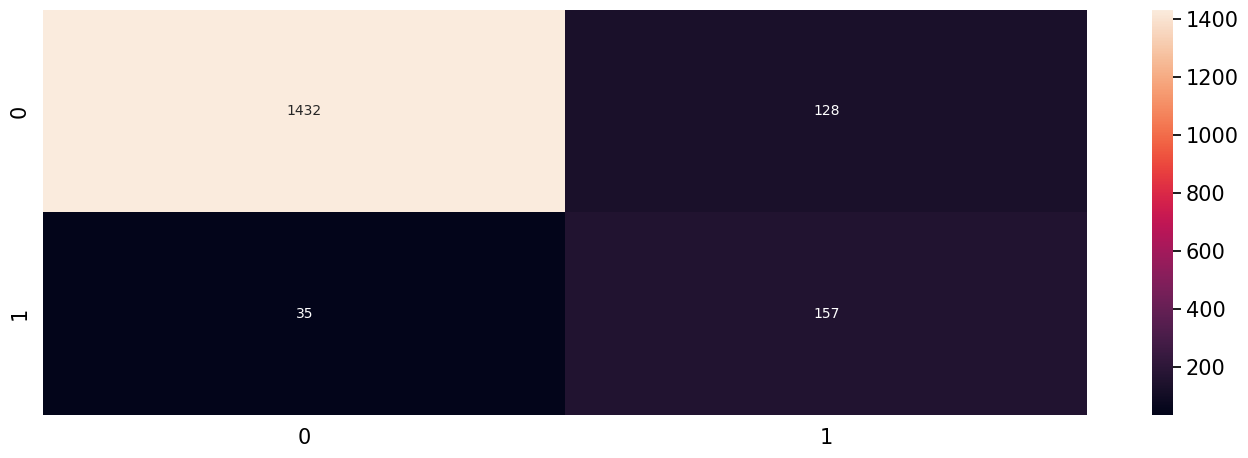

Random Forest

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1560
           1       0.83      0.79      0.81       192

    accuracy                           0.96      1752
   macro avg       0.90      0.89      0.89      1752
weighted avg       0.96      0.96      0.96      1752


 confussion matrix:
 [[1529   31]
 [  40  152]]




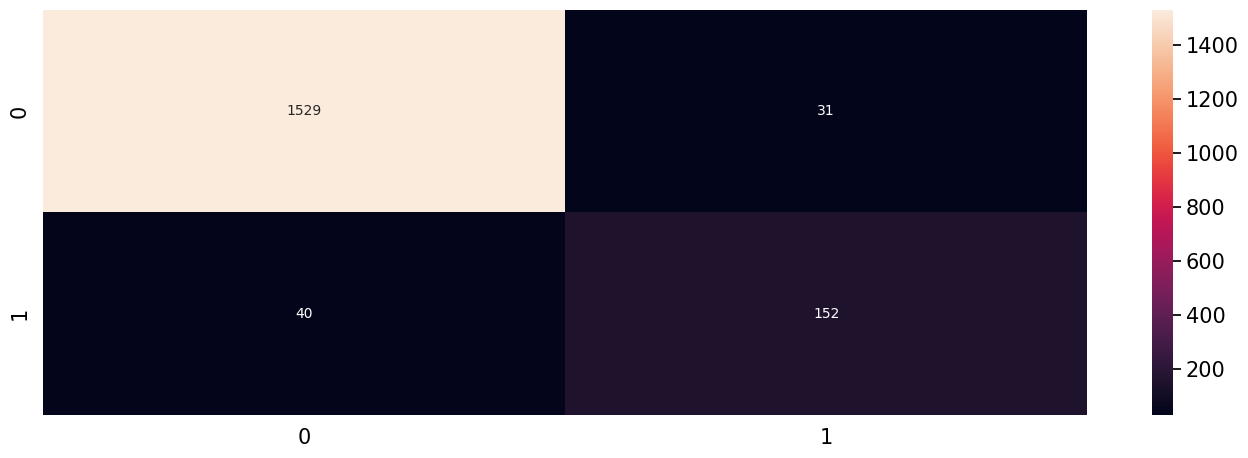

AdaBoost

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1560
           1       0.31      0.84      0.45       192

    accuracy                           0.78      1752
   macro avg       0.64      0.81      0.66      1752
weighted avg       0.90      0.78      0.81      1752


 confussion matrix:
 [[1198  362]
 [  30  162]]




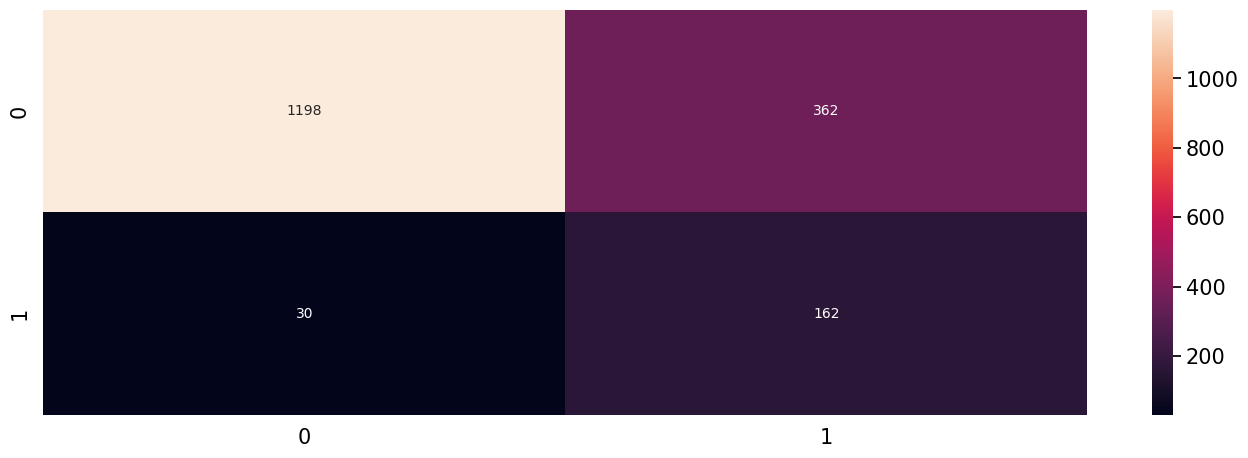

Extra Trees

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1560
           1       0.90      0.77      0.83       192

    accuracy                           0.97      1752
   macro avg       0.93      0.88      0.90      1752
weighted avg       0.96      0.97      0.96      1752


 confussion matrix:
 [[1543   17]
 [  44  148]]




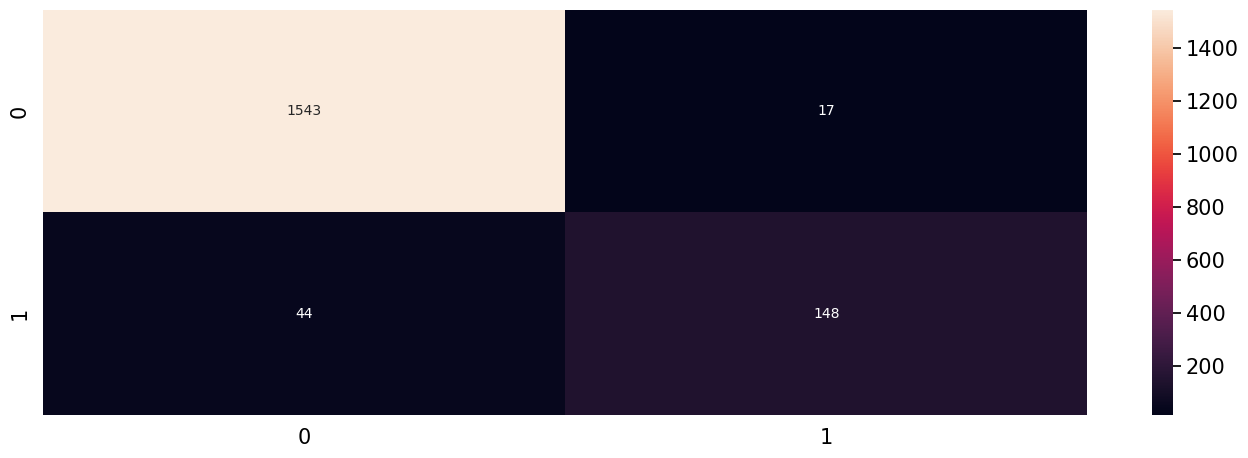

In [ ]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
specificity = []
loss_log = []
roc= []
cohen_kappa = []
mcc = []

random_state = 2

models = ["LogisticRegression",
          "Decision Tree",
          "Gaussian NB",
          "Random Forest",
          "AdaBoost",
          "Extra Trees"]

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
classifiers.append(ExtraTreesClassifier(random_state=random_state))

for classifier, model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction,))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')
    CM = confusion_matrix(y_test, prediction)
    sns.heatmap(CM, annot=True, fmt='d')
    plt.show()

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Specificity = TN/(TN+FP)
    specificity.append(Specificity)

    Loss_log = metrics.log_loss(y_test, prediction)
    loss_log.append(Loss_log)

    ROC=metrics.roc_auc_score(y_test, prediction)
    roc.append(ROC)

    Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
    cohen_kappa.append(Cohen_Kappa)

    MCC = metrics.matthews_corrcoef(y_test, prediction)
    mcc.append(MCC)

In [ ]:
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log
scoreDF.set_index("Model")

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  Specificity  Matthew Correlation Coefficient  Cohen Kappa  ROC Score  Loss Log
Model                                                                                                                                                           
LogisticRegression        0.955858       0.896119   0.515060  0.890625  0.652672     0.896795                         0.627633     0.596661   0.893710  3.744261
Decision Tree             1.000000       0.782534   0.316505  0.848958  0.461103     0.774359                         0.427399     0.358719   0.811659  7.838260
Gaussian NB               0.960396       0.906963   0.550877  0.817708  0.658281     0.917949                         0.622660     0.606788   0.867829  3.353376
Random Forest             1.000000       0.959475   0.830601  0.791667  0.810667     0.980128                         0.788275     0.787990   0.885897  1.460673
AdaBoost                  1.000000       0.776256   0.309160  0.843750  0.452514     0.767949                         0.417336     0.347917   0.805849  8.064562
Extra Trees               1.000000       0.965183   0.896970  0.770833  0.829132     0.989103                         0.812755     0.809871   0.879968  1.254945

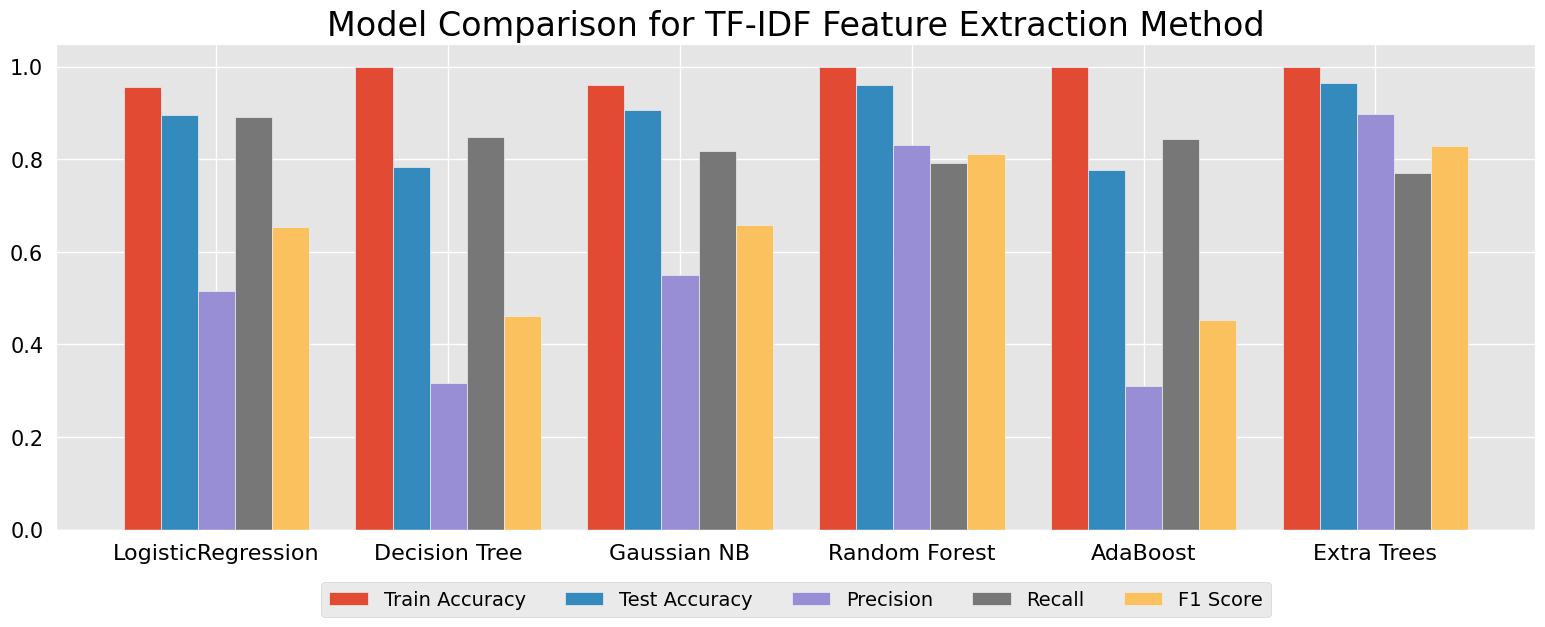

In [ ]:
plt.style.use('ggplot')
def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", label = cols[i])


    plt.xticks(_X, X)

params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
         'axes.labelsize': '16',
         'axes.titlesize':'24',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'



plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.title('Model Comparison for TF-IDF Feature Extraction Method')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', ncol = 5)
plt.xticks(rotation = 0, fontsize = 16)
plt.show();

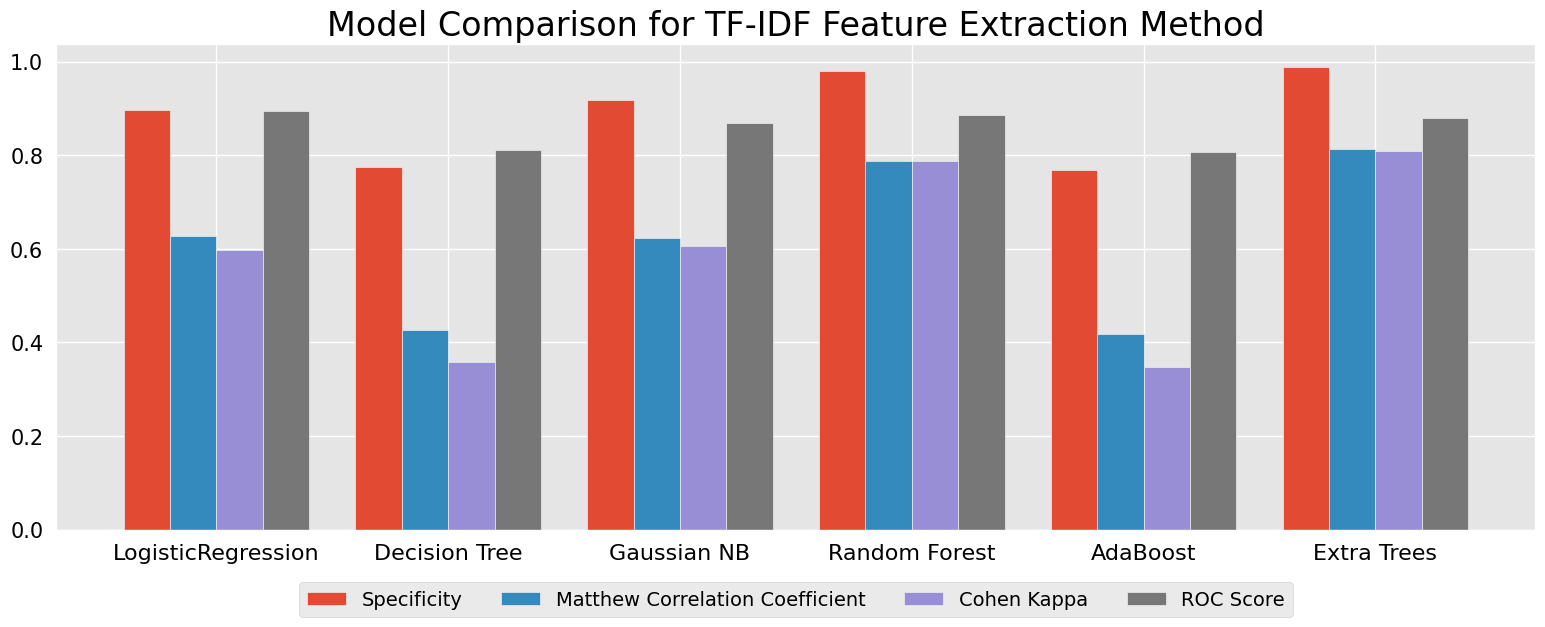

In [ ]:
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Specificity'], scoreDF['Matthew Correlation Coefficient'], scoreDF['Cohen Kappa'], scoreDF['ROC Score']])
cols = ['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score']
plt.xticks(rotation = 0, fontsize = 16)
plt.title('Model Comparison for TF-IDF Feature Extraction Method')
plt.legend(['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score'] ,bbox_to_anchor =(0.5,-0.2), loc='lower center', ncol = 5)
plt.show();

---

## Objective -
1.a Tune Logistic Regression Model using Hyper-parameter tuning for Count Vectoriser
1.b Tune Random Forest Model using Hyper-parameter tuning for TF-IDF

2. Comparing the best model with all above models and check the F1 score (best scoring criteria)
3. Use XGboost with tfidf and tune it further, to see if we can beat the logistic regression model and Random forest model
4. Use CNN model
5. Select Best Model

###  LOGISTIC REGRESSION WITH COUNT VECTORISER IS THE BEST MODEL.
### RANDOM FOREST MODEL WITH TF_IDF IS SECOND THE BEST MODEL

### TUNING LOGISTIC REGRESSION MODEL

In [ ]:
# Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#specifying all hyperparameters with possible values
param= {'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}
# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="accuracy",cv=folds,return_train_score=True, verbose = True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
# After fitting the model, we will extract the best fit values for all specified hyperparameters.
 # print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9605335533553355
Best hyperparameters:  {'C': 10}


In [ ]:
#Building Model again with best params
lr2=model.best_estimator_
lr2.fit(X_train,y_train)

LogisticRegression(C=10)

In [ ]:
prediction = lr2.predict(X_test)


 Accuracy Score:
 0.9394977168949772

 Clasification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1560
           1       0.68      0.83      0.75       192

    accuracy                           0.94      1752
   macro avg       0.83      0.89      0.86      1752
weighted avg       0.95      0.94      0.94      1752


 Confussion Matrix:
 [[1486   74]
 [  32  160]]




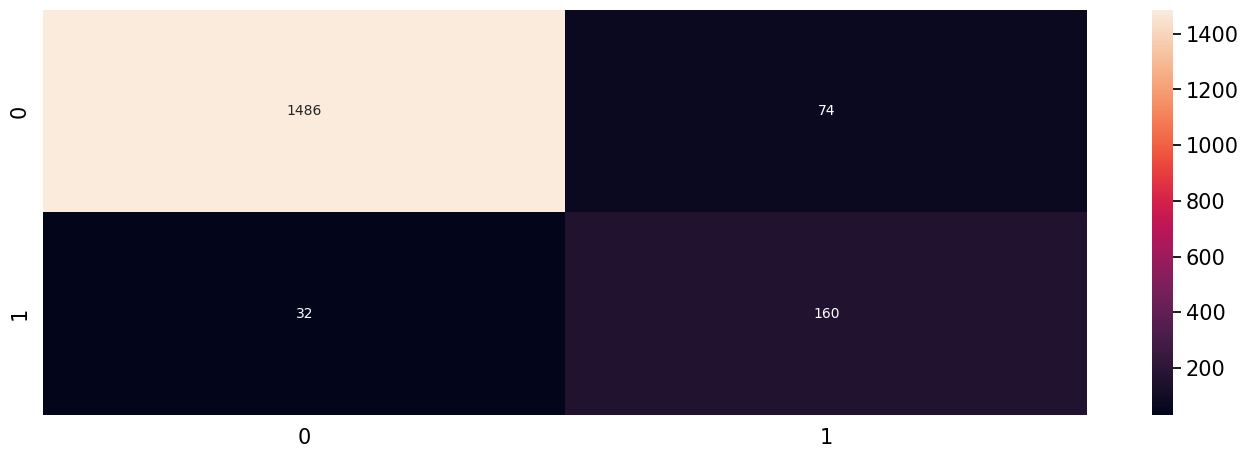

In [ ]:
print('\n Accuracy Score:\n', accuracy_score(y_test,prediction))
print('\n Clasification Report:\n', classification_report(y_test,prediction))
print('\n Confussion Matrix:\n',confusion_matrix(y_test, prediction))
print('\n')

CM = confusion_matrix(y_test, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

Tuned Logistic Regression Classifier

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1560
           1       0.68      0.83      0.75       192

    accuracy                           0.94      1752
   macro avg       0.83      0.89      0.86      1752
weighted avg       0.95      0.94      0.94      1752


 confussion matrix:
 [[1486   74]
 [  32  160]]


Train Accuracy :  0.98
Test Accuracy :  0.94
Precision Score :  0.95
Recall Score :  0.94
F1 Score :  0.94


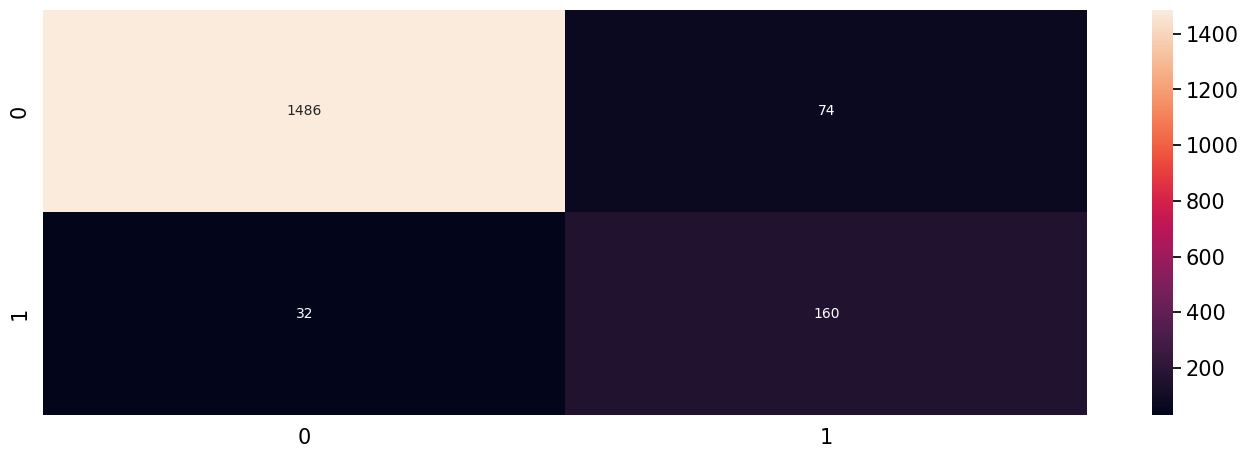

Specificity :  0.95
Cohen Kappa Score :  0.72
MCC Score :  0.72


In [ ]:
trainprediction = lr2.predict(X_train)
prediction = lr2.predict(X_test)
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
precision__score = precision_score(y_test, prediction,average = 'weighted')
recall__score = recall_score(y_test, prediction,average = 'weighted')
f1__score = f1_score(y_test, prediction,average = 'weighted')
print('====================================')
print('Tuned Logistic Regression Classifier')
print('====================================')
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))



CM = confusion_matrix(y_test, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
MCC = metrics.matthews_corrcoef(y_test, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

### Tuning Random Forest Classifier

In [ ]:
# Determine optimal parameters:
# Declare a baseline classifier:
rf = RandomForestClassifier()

# Create the grid parameter:
grid_rf = {'n_estimators': [100],
            'max_depth': [5,7,9],
            'max_leaf_nodes': [1,3,5],
            #'min_samples_split' : [2, 3, 5, 10]
          }

# Create the grid:
gs_rf = GridSearchCV(rf, grid_rf, cv=3,scoring="f1",return_train_score=True, verbose = True)
# Fit using grid search:
gs_rf.fit(X_train, y_train)
# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best accuracy: 0.816

Best params:
 {'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 100}


In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set:
rforest = RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators = 100)
rforest.fit(X_train,y_train)
y_pred_test_rf = rforest.predict(X_test)
y_pred_train_rf = rforest.predict(X_train)

# Check the Accuracy:
print('Random Forest Train Accuracy: ', accuracy_score(y_train, y_pred_train_rf)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_test_rf)*100,'%')

Random Forest Train Accuracy:  95.80583058305831 %
Random Forest Test Accuracy:  84.70319634703196 %


Tuned Random Forest Classifier

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      1560
           1       0.41      0.87      0.55       192

    accuracy                           0.85      1752
   macro avg       0.69      0.86      0.73      1752
weighted avg       0.92      0.85      0.87      1752


 confussion matrix:
 [[1317  243]
 [  25  167]]


Train Accuracy :  0.96
Test Accuracy :  0.85
Precision Score :  0.92
Recall Score :  0.85
F1 Score :  0.87


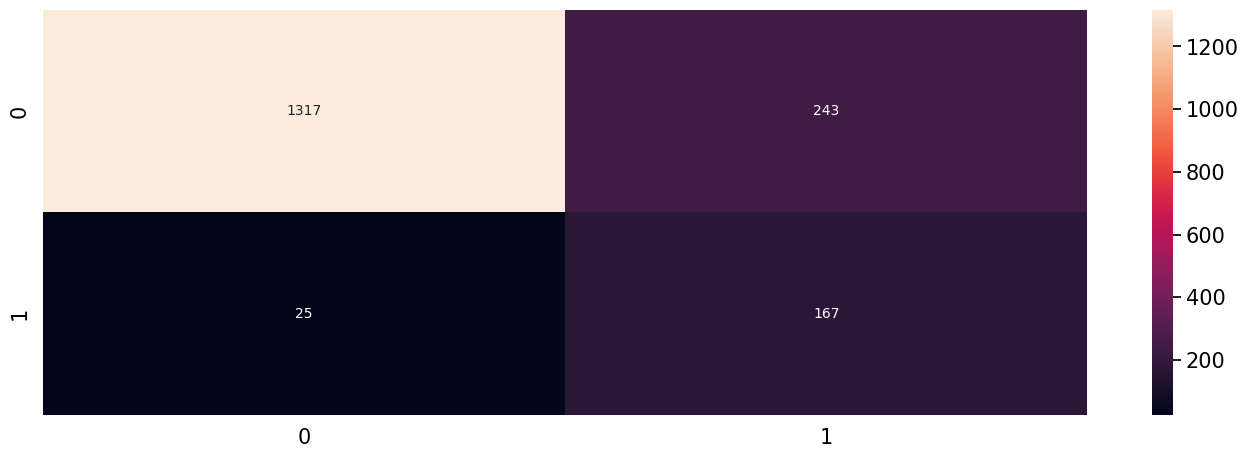

Specificity :  0.84
Cohen Kappa Score :  0.48
MCC Score :  0.53


In [ ]:
trainprediction = rforest.predict(X_train)
prediction = rforest.predict(X_test)
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
precision__score = precision_score(y_test, prediction,average = 'weighted')
recall__score = recall_score(y_test, prediction,average = 'weighted')
f1__score = f1_score(y_test, prediction,average = 'weighted')

print('====================================')
print('Tuned Random Forest Classifier')
print('====================================')
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
print('\n')


print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))


print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))


CM = confusion_matrix(y_test, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
MCC = metrics.matthews_corrcoef(y_test, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

### XGboost Classifier

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_test_rf = xgboost.predict(X_test)
y_pred_train_rf = xgboost.predict(X_train)

# Check the Accuracy:
print('XGBoost Train Accuracy: ', np.round(accuracy_score(y_train, y_pred_train_rf)*100, 2),'%')
print('XGBoost Test Accuracy: ', np.round(accuracy_score(y_test, y_pred_test_rf)*100, 2),'%')

XGBoost Train Accuracy:  99.93 %
XGBoost Test Accuracy:  85.16 %


Tuned XGBOOST Classifier

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1560
           1       0.42      0.89      0.57       192

    accuracy                           0.85      1752
   macro avg       0.70      0.87      0.74      1752
weighted avg       0.92      0.85      0.87      1752


 confussion matrix:
 [[1321  239]
 [  21  171]]


Train Accuracy :  1.0
Test Accuracy :  0.85
Precision Score :  0.92
Recall Score :  0.85
F1 Score :  0.87


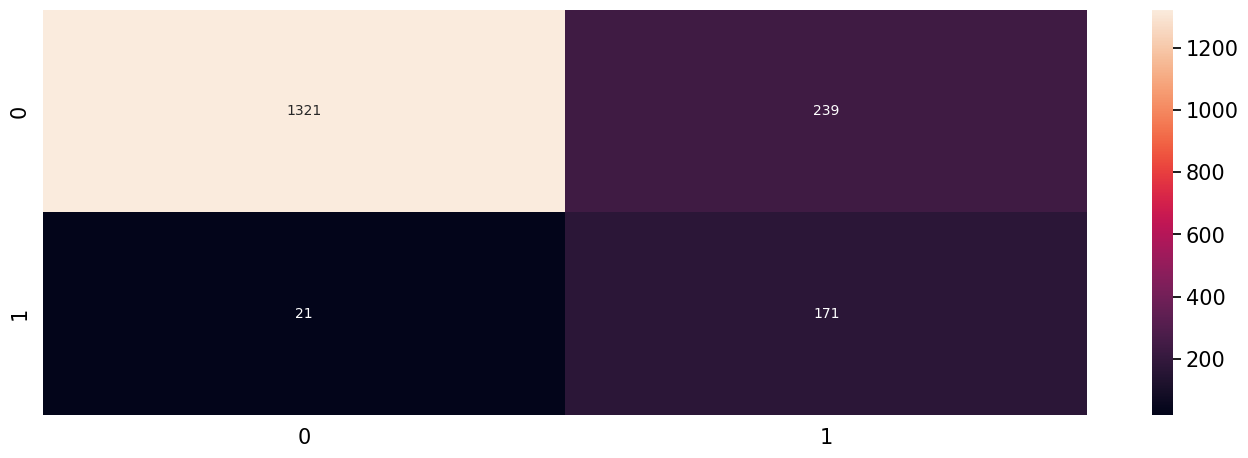

Specificity :  0.85
Cohen Kappa Score :  0.49
MCC Score :  0.54


In [ ]:
trainprediction = xgboost.predict(X_train)
prediction = xgboost.predict(X_test)
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
precision__score = precision_score(y_test, prediction,average = 'weighted')
recall__score = recall_score(y_test, prediction,average = 'weighted')
f1__score = f1_score(y_test, prediction,average = 'weighted')
print('====================================')
print('Tuned XGBOOST Classifier')
print('====================================')
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))

CM = confusion_matrix(y_test, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
MCC = metrics.matthews_corrcoef(y_test, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

# Deep Learning Model

In [ ]:
df = pd.read_csv('Processed_df_final_exp_3_3.csv')
df.columns

Index(['ParentTweet', 'Parent tweet place', 'Parent tweet geo location', 'Parent tweet hashtags', 'Parent tweet symbols', 'Parent tweet user mentions', 'Parent tweet URLs', 'Parent quote status', 'Parent possibly sensitive', 'Parent tweet num retweets', 'Parent tweet num favorites', 'UserId', 'location', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'DirectReply', 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count', 'Parent_Average Word Length', 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count', 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count', 'Parent_Average Sentence Length', 'Parent_Positive Sentiment Score', 'Parent_Negative Sentiment Score',
 

In [ ]:
# Replace any non-boolean values in "Parent quote status" column
df["Parent quote status"] = df["Parent quote status"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Replace any non-boolean values in "Parent possibly sensitive" column
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].fillna(False).replace({"True": True, "False": False, "nan": False}).astype(bool)

# Convert the columns to category data type
df["Parent quote status"] = df["Parent quote status"].astype("category")
df["Parent possibly sensitive"] = df["Parent possibly sensitive"].astype("category")

df = df.replace({True: 1, False: 0})
df = df.replace({'True': 1, 'False': 0})
df = df.replace({'Yes': 1, 'No': 0})

In [ ]:
meta_features = ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified',
                 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled',
                 'has_extended_profile', 'default_profile', 'default_profile_image', 'following',
                 'follow_request_sent', 'notifications',

                 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count',
                 'Parent_Average Word Length',
                 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count',
                 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count',
                 'Parent_Average Sentence Length', 'DirectReply_Word Count', 'DirectReply_Character Count',
                 'DirectReply_Sentence Count', 'DirectReply_Average Word Length', 'DirectReply_Stopword Count',
                 'DirectReply_Hashtag Count', 'DirectReply_Mention Count', 'DirectReply_URL Count',
                 'DirectReply_Capitalized Word Count', 'DirectReply_Punctuation Count',
                 'DirectReply_Average Sentence Length'
                  ]


target_features = df['Hatred/Abusive']
metaDF = df[meta_features]
metaDF.head()

followers_count  friends_count  listed_count  favourites_count  geo_enabled  verified  statuses_count  contributors_enabled  is_translator  is_translation_enabled  has_extended_profile  default_profile  default_profile_image  following  follow_request_sent  notifications  Parent_Word Count  Parent_Character Count  Parent_Sentence Count  Parent_Average Word Length  Parent_Stopword Count  Parent_Hashtag Count  Parent_Mention Count  Parent_URL Count  Parent_Capitalized Word Count  Parent_Punctuation Count  Parent_Average Sentence Length  DirectReply_Word Count  DirectReply_Character Count  DirectReply_Sentence Count  DirectReply_Average Word Length  DirectReply_Stopword Count  DirectReply_Hashtag Count  DirectReply_Mention Count  DirectReply_URL Count  DirectReply_Capitalized Word Count  DirectReply_Punctuation Count  DirectReply_Average Sentence Length
0        7710400.0         2410.0        2409.0            1298.0            0         1         85530.0                     0              0                       0                     0                0                      0          0                    0              0               51.0                   302.0                    1.0                    5.000000                    0.0                   1.0                   0.0               2.0                            0.0                      12.0                       51.000000                   547.0                       2866.0                        17.0                         4.458867                        54.0                       11.0                       42.0                   16.0                                21.0                          217.0                            32.176471
1         270178.0           74.0         141.0             112.0            1         0          1017.0                     0              0                       0                     0                1                      0          0                    0              0               26.0                   143.0                    3.0                    4.769231                    6.0                   1.0                   0.0               1.0                            1.0                      12.0                        8.666667                   688.0                       3809.0                        33.0                         4.716570                       224.0                       11.0                       62.0                    2.0                                19.0                          152.0                            20.848485
2        2561864.0       247972.0       17533.0            1198.0            1         1        319703.0                     0              0                       0                     0                0                      0          0                    0              0               60.0                   267.0                    2.0                    3.833333                   17.0                   2.0                   0.0               2.0                            0.0                      24.0                       30.000000                    26.0                        122.0                         2.0                         3.884615                        11.0                        1.0                        1.0                    0.0                                 2.0                            6.0                            13.000000
3             97.0          174.0           0.0             303.0            0         0          4427.0                     0              0                       0                     1                1                      0          0                    0              0               37.0                   222.0                    1.0                    5.378378                    4.0                  12.0                   0.0               1.0                            0.0                      18.0                       37.000

In [ ]:
import pandas as pd

def transform_dataframe(df):
    transformed_df = pd.DataFrame()

    for column in df.columns:
        if df[column].dtype == 'object':
            if len(df[column].unique()) == 2:
                if df[column].nunique() == 2 and set(df[column].unique()) == set(['true', 'false']):
                    transformed_df[column] = df[column].map({'true': 1, 'false': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['True', 'False']):
                    transformed_df[column] = df[column].map({'True': 1, 'False': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set([True, False]):
                    transformed_df[column] = df[column].map({True: 1, False: 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['Yes', 'No']):
                    transformed_df[column] = df[column].map({'Yes': 1, 'No': 0})
                elif df[column].nunique() == 2 and set(df[column].unique()) == set(['yes', 'no']):
                    transformed_df[column] = df[column].map({'yes': 1, 'no': 0})
                else:
                    transformed_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            else:
                transformed_df[column] = df[column]
        else:
            transformed_df[column] = (df[column] - df[column].mean()) / df[column].std()

    transformed_df = transformed_df.loc[:, transformed_df.nunique() > 1]

    return transformed_df


In [ ]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df['cleaned_ParentTweet']
y = df['Hatred/Abusive']

In [ ]:
print('Shape of Features : ', X.shape)
print('Shape of labels : ', y.shape)

Shape of Features :  (5840,)
Shape of labels :  (5840,)


In [ ]:
## Converting text into numerical representation i.e Tensors
## Then we can format our text samples and labels into tensors that can be fed into a neural network. Some Preprocessing is needed here like Tokenization
X.fillna("None", inplace=True)  # Replace NaN values with an empty string

MAX_NUM_WORDS=10000 # how many unique words to use
MAX_SEQUENCE_LENGTH=300 # max number of words in a review to use

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8425 unique tokens.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(y))
labels = y

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (5840, 300)
Shape of label tensor: (5840,)


In [ ]:
# split the data into a training set and a validation set
VALIDATION_SPLIT=0.3

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [ ]:
metaDF.columns

Index(['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'geo_enabled', 'verified', 'statuses_count', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'Parent_Word Count', 'Parent_Character Count', 'Parent_Sentence Count', 'Parent_Average Word Length', 'Parent_Stopword Count', 'Parent_Hashtag Count', 'Parent_Mention Count', 'Parent_URL Count', 'Parent_Capitalized Word Count', 'Parent_Punctuation Count', 'Parent_Average Sentence Length', 'DirectReply_Word Count', 'DirectReply_Character Count', 'DirectReply_Sentence Count', 'DirectReply_Average Word Length', 'DirectReply_Stopword Count', 'DirectReply_Hashtag Count', 'DirectReply_Mention Count', 'DirectReply_URL Count', 'DirectReply_Capitalized Word Count', 'DirectReply_Punctuation Count', 'DirectReply_Average Sentence Length'], dtype='object')

In [ ]:
numerical_cols = meta_features

In [ ]:
# Apply scaling
scaler = StandardScaler()
metaDF[numerical_cols] = scaler.fit_transform(metaDF[numerical_cols])
meta_train = metaDF.values[:-nb_validation_samples, :]
meta_val = metaDF.values[-nb_validation_samples:, :]

In [ ]:
meta_train.shape

(4088, 38)

In [ ]:
x_train.shape

(4088, 300)

In [ ]:
y_train.shape

(4088,)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smt = SMOTE(sampling_strategy='minority')
# x_train_combined = np.concatenate((x_train, meta_train), axis=1)
# x_train_resampled, y_train_resampled = smt.fit_resample(x_train_combined, y_train)

# # Split the resampled data back into x_train and meta_train
# num_features_of_x_train = x_train.shape[1]  # Replace with the actual number of features
# x_train = x_train_resampled[:, :num_features_of_x_train]
# meta_train = x_train_resampled[:, num_features_of_x_train:]

# # Check the shapes
# print("x_train shape:", x_train.shape)
# print("meta_train shape:", meta_train.shape)
# print("y_train shape:", y_train_resampled.shape)

# y_train = y_train_resampled.copy()

In [ ]:
## Preparing the Embedding layer
GLOVE_DIR=''

import os
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'),encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coef
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


# LSTM Model

In [ ]:
## compute embedding matrix
#  At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix

EMBEDDING_DIM = 300 # how big is each word vector
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros
        embedding_matrix[i] = embedding_vector

In [ ]:
### Define Embedding Layer
### We load this embedding matrix into an Embedding layer. Note that we set trainable=False to prevent the weights from being updated during training.
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
x_train.shape, meta_train.shape, y_train.shape #Training

((4088, 300), (4088, 38), (4088,))

In [ ]:
x_val.shape, meta_val.shape, y_val.shape #testing

((1752, 300), (1752, 38), (1752,))

In [ ]:
y_train = y_train.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalMaxPool1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

# Debug: Print shapes of training and validation data
print("Shape of x_train:", x_train.shape)
print("Shape of meta_train:", meta_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of meta_val:", meta_val.shape)

# Check the input shape of meta_train and meta_val
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1

# Glove embedding layer
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH, trainable=True)

# Input layers
inp_text = Input(shape=(MAX_SEQUENCE_LENGTH,))
inp_meta = Input(shape=(meta_input_shape,))

# Glove embedded features
x_text = embedding_layer(inp_text)
# LSTM and pooling layers for text
x_text = Bidirectional(LSTM(128, return_sequences=True))(x_text)
x_text = GlobalMaxPool1D()(x_text)

# Concatenate embedded features with meta features
x = Concatenate()([x_text, inp_meta])

# Dense layers with regularization
x = Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(8, activation="tanh", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)

# Define model with two inputs and one output
model = Model(inputs=[inp_text, inp_meta], outputs=x)

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.01), metrics=['accuracy'])

# Calculate class weights
class_weights = {0: 1.0, 1: 2}  # Adjust weights based on class distribution

# Train the model with both text and meta features
model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128, class_weight=class_weights)


Shape of x_train: (4088, 300)
Shape of meta_train: (4088, 38)
Shape of x_val: (1752, 300)
Shape of meta_val: (1752, 38)
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8012 - loss: 0.7422 - val_accuracy: 0.8921 - val_loss: 0.3673
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8703 - loss: 0.5845 - val_accuracy: 0.8385 - val_loss: 0.3618
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8964 - loss: 0.4296 - val_accuracy: 0.9355 - val_loss: 0.2403
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9476 - loss: 0.2794 - val_accuracy: 0.9212 - val_loss: 0.2554
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9584 - loss: 0.2188 - val_accuracy: 0.9030 - val_loss: 0.2927
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9677 - loss: 0.1745 - val_accuracy: 0.9435 - val_loss: 0.1870
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9791 - loss: 0.1190 - val_accuracy: 0.9424 - val_loss

In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Tuned BI-LSTM Model Classifier

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1563
           1       0.80      0.75      0.77       189

    accuracy                           0.95      1752
   macro avg       0.88      0.86      0.87      1752
weighted avg       0.95      0.95      0.95      1752


 confussion matrix:
 [[1527   36]
 [  47  142]]


Train Accuracy :  0.99
Test Accuracy :  0.95
Precision Score :  0.95
Recall Score :  0.95
F1 Score :  0.95


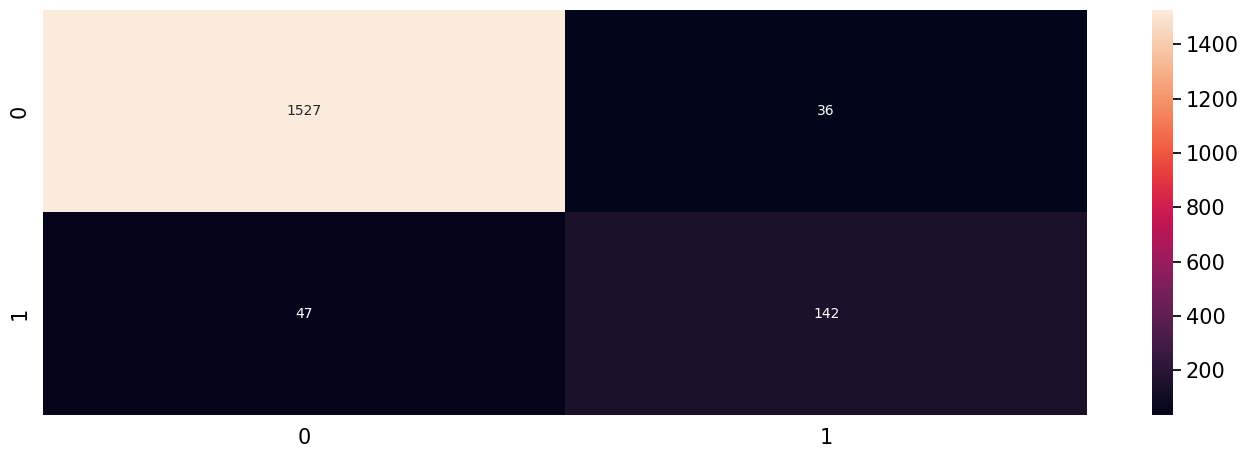

Specificity :  0.98
Cohen Kappa Score :  0.75
MCC Score :  0.75


In [ ]:
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('====================================')
print('Tuned BI-LSTM Model Classifier')
print('====================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))



CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

# CNN + FCN

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

MAX_NUM_WORDS = 10000
max_sequence_length = 300
embedding_dim = 300
num_filters = 128
drop = 0.2

print("Creating Model...")

# Text input
inputs_text = Input(shape=(max_sequence_length,), dtype='int32')
embedding = Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim, input_length=max_sequence_length)(inputs_text)

# Convolutional layer
conv = Conv1D(filters=num_filters, kernel_size=3, activation='relu')(embedding)
pool = GlobalMaxPooling1D()(conv)
dropout = Dropout(drop)(pool)

# Meta features input
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1
inputs_meta = Input(shape=(meta_input_shape,))

# Concatenate text and meta features
concatenated = Concatenate()([dropout, inputs_meta])

# Dense layer
preds = Dense(1, activation='sigmoid')(concatenated)

# Define the model with both text and meta features as inputs
model = Model(inputs=[inputs_text, inputs_meta], outputs=preds)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['acc'])

model.summary()

# Train the model with both text and meta features
model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128)


Creating Model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 300, 300)       │      3,000,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 298, 128)       │        115,328 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 128)            │              0 │ conv1d[0][0]           │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 38)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 166)            │              0 │ dropout_2[0][0],       │
│ (Concatenate)             │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            167 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,115,495 (11.88 MB)

 Trainable params: 3,115,495 (11.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - acc: 0.7812 - loss: 0.4841 - val_acc: 0.8927 - val_loss: 0.2972
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8975 - loss: 0.2607 - val_acc: 0.9321 - val_loss: 0.1991
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9460 - loss: 0.1379 - val_acc: 0.9521 - val_loss: 0.1364
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9834 - loss: 0.0586 - val_acc: 0.9566 - val_loss: 0.1335
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9910 - loss: 0.0291 - val_acc: 0.9509 - val_loss: 0.1395
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9907 - loss: 0.0222 - val_acc: 0.9526 - val_loss: 0.1554
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9925 - loss: 0.0197 - val_acc: 0.9526 - val_loss: 0.1638
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9948 - loss: 0.0178 - val_acc: 0.9521 - val_loss: 0.1696
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9940

In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


   Tuned CNN- FCN Model Classifier  

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1563
           1       0.82      0.67      0.74       189

    accuracy                           0.95      1752
   macro avg       0.89      0.82      0.85      1752
weighted avg       0.95      0.95      0.95      1752


 confussion matrix:
 [[1536   27]
 [  63  126]]


Train Accuracy :  0.99
Test Accuracy :  0.95
Precision Score :  0.95
Recall Score :  0.95
F1 Score :  0.95


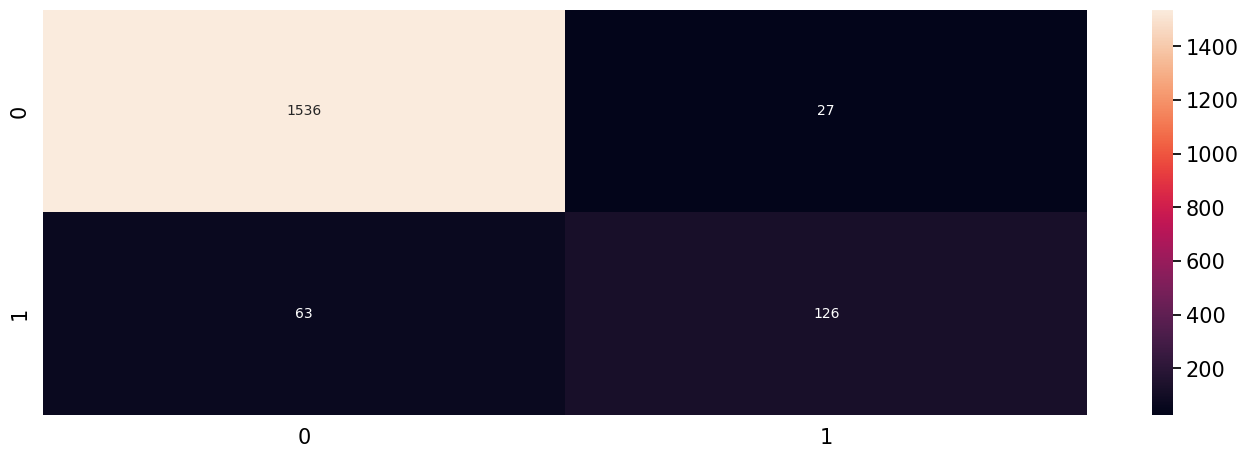

Specificity :  0.98
Cohen Kappa Score :  0.71
MCC Score :  0.71


In [ ]:
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('====================================')
print('   Tuned CNN- FCN Model Classifier  ')
print('====================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))



CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

# CNN + GRU

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from tensorflow.keras.layers import Reshape, Conv2D, MaxPool2D, Concatenate, Flatten

max_features = embedding_matrix.shape[0] # how many unique words to use
maxlen=300 # max number of words in a review to use
embed_size = 300

In [ ]:
x_train.shape, meta_train.shape, y_train.shape

((4088, 300), (4088, 38), (4088,))

In [ ]:
x_val.shape, meta_val.shape, y_val.shape

((1752, 300), (1752, 38), (1752,))

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, GRU, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Text input
sequence_input = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])

# Meta features input
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1
inputs_meta = Input(shape=(meta_input_shape,))

# Concatenate text and meta features
concatenated = concatenate([x, inputs_meta])

x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.1)(x)
preds = Dense(1, activation='sigmoid')(x)

# Define the model with both text and meta features as inputs
model = Model(inputs=[sequence_input, inputs_meta], outputs=preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 300, 300)       │      2,527,800 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d         │ (None, 300, 300)       │              0 │ embedding_3[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 300, 256)       │        330,240 │ spatial_dropout1d[0][… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 298, 64)        │         49,216 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ conv1d_1[0][0]         │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 64)             │              0 │ conv1d_1[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 128)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 38)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 166)            │              0 │ concatenate_2[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         21,376 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            129 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,928,761 (11.17 MB)

 Trainable params: 400,961 (1.53 MB)

 Non-trainable params: 2,527,800 (9.64 MB)

In [ ]:
# Train the model with both text and meta features
history = model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.8345 - loss: 0.4545 - val_accuracy: 0.8921 - val_loss: 0.3021
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8960 - loss: 0.2774 - val_accuracy: 0.9304 - val_loss: 0.2299
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9222 - loss: 0.2161 - val_accuracy: 0.9401 - val_loss: 0.1818
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9485 - loss: 0.1461 - val_accuracy: 0.9412 - val_loss: 0.1577
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9599 - loss: 0.1132 - val_accuracy: 0.9389 - val_loss: 0.1561
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9763 - loss: 0.0807 - val_accuracy: 0.9521 - val_loss: 0.1487
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9834 - loss: 0.0580 - val_accuracy: 0.9515 - val_loss: 0.1713
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9851 - loss: 0.0519 - val_accuracy: 0.9532 - v

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
   Tuned CNN- GRU Model Classifier  

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1563
           1       0.84      0.67      0.74       189

    accuracy                           0.95      1752
   macro avg       0.90      0.83      0.86      1752
weighted avg       0.95      0.95      0.95      1752


 confussion matrix:
 [[1538   25]
 [  62  127]]


Train Accuracy :  0.99
Test Accuracy :  0.95
Precision Score :  0.95
Recall Score :  0.95
F1 Score :  0.95


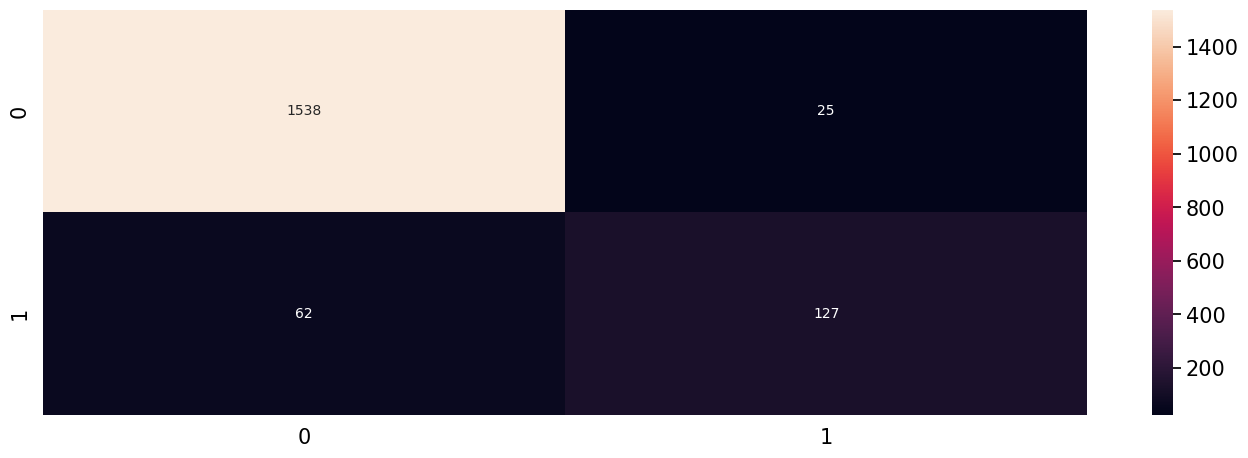

Specificity :  0.98
Cohen Kappa Score :  0.72
MCC Score :  0.72


In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracay = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('====================================')
print('   Tuned CNN- GRU Model Classifier  ')
print('====================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))


CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

# CNN + RNN

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, SimpleRNN, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.models import Model

# Text input
sequence_input = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(SimpleRNN(128, return_sequences=True))(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])

# Meta features input
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1
inputs_meta = Input(shape=(meta_input_shape,))

# Concatenate text and meta features
concatenated = concatenate([x, inputs_meta])

x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.1)(x)
preds = Dense(1, activation='sigmoid')(x)

# Define the model with both text and meta features as inputs
model = Model(inputs=[sequence_input, inputs_meta], outputs=preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 300, 300)       │      2,527,800 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_1       │ (None, 300, 300)       │              0 │ embedding_4[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 300, 256)       │        109,824 │ spatial_dropout1d_1[0… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 298, 64)        │         49,216 │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ conv1d_2[0][0]         │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 64)             │              0 │ conv1d_2[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 128)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 38)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 166)            │              0 │ concatenate_4[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         21,376 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            129 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,708,345 (10.33 MB)

 Trainable params: 180,545 (705.25 KB)

 Non-trainable params: 2,527,800 (9.64 MB)

In [ ]:
# Train the model with both text and meta features
history = model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.8413 - loss: 0.4184 - val_accuracy: 0.9058 - val_loss: 0.2479
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9101 - loss: 0.2381 - val_accuracy: 0.9389 - val_loss: 0.1833
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9467 - loss: 0.1595 - val_accuracy: 0.9384 - val_loss: 0.1677
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9644 - loss: 0.1148 - val_accuracy: 0.9532 - val_loss: 0.1400
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9787 - loss: 0.0696 - val_accuracy: 0.9532 - val_loss: 0.1372
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9786 - loss: 0.0722 - val_accuracy: 0.9555 - val_loss: 0.1424
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9832 - loss: 0.0727 - val_accuracy: 0.9521 - val_loss: 0.1910
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9817 - loss: 0.0664 - val_accuracy: 0.9589 -

128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
   Tuned CNN- RNN Model Classifier  

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1563
           1       0.86      0.70      0.77       189

    accuracy                           0.96      1752
   macro avg       0.91      0.84      0.87      1752
weighted avg       0.95      0.96      0.95      1752


 confussion matrix:
 [[1541   22]
 [  56  133]]


Train Accuracy :  0.99
Test Accuracy :  0.95
Precision Score :  0.95
Recall Score :  0.96
F1 Score :  0.95


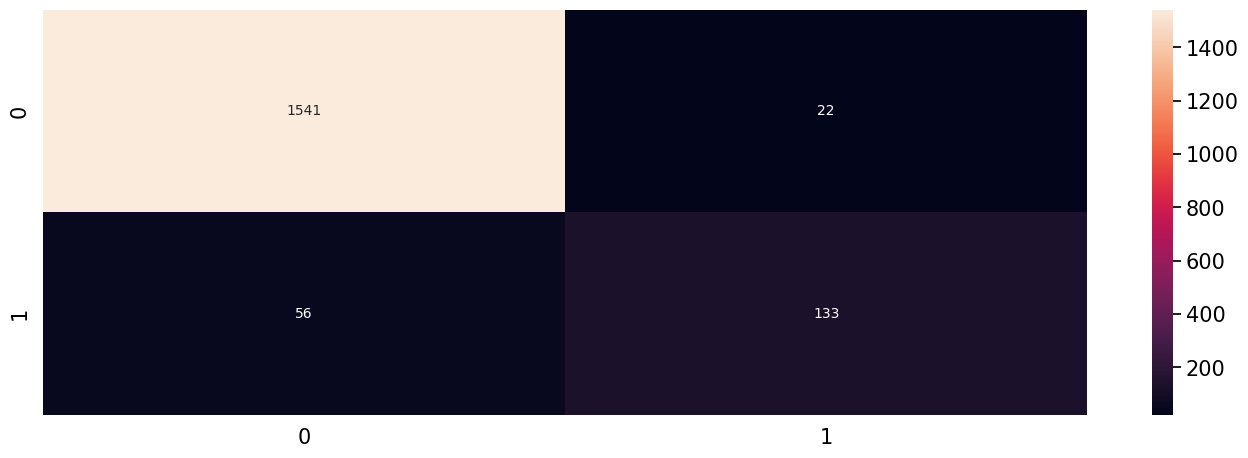

Specificity :  0.99
Cohen Kappa Score :  0.75
MCC Score :  0.75


In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracay = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('====================================')
print('   Tuned CNN- RNN Model Classifier  ')
print('====================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))


CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

## Model 5

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, SimpleRNN, Conv1D, Dense, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Multiply, Flatten, RepeatVector, Permute, Lambda, Activation
from tensorflow.keras.models import Model

max_features = embedding_matrix.shape[0]
maxlen = 300
embed_size = 300

# Text input
sequence_input = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(SimpleRNN(128, return_sequences=True))(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)

# Attention mechanism
attention_weights = Dense(1, activation='tanh')(x)
attention_weights = Flatten()(attention_weights)
attention_weights = Activation('softmax')(attention_weights)
attention_weights = RepeatVector(64)(attention_weights)
attention_weights = Permute([2, 1])(attention_weights)
attention_output = Multiply()([x, attention_weights])
attention_output = Lambda(lambda x: K.sum(x, axis=1))(attention_output)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool, attention_output])

# Meta features input
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1
inputs_meta = Input(shape=(meta_input_shape,))

# Concatenate text and meta features
concatenated = concatenate([x, inputs_meta])

x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.1)(x)
preds = Dense(1, activation='sigmoid')(x)

# Define the model with both text and meta features as inputs
model = Model(inputs=[sequence_input, inputs_meta], outputs=preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 300, 300)       │      2,527,800 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_2       │ (None, 300, 300)       │              0 │ embedding_5[0][0]      │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 300, 256)       │        109,824 │ spatial_dropout1d_2[0… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 298, 64)        │         49,216 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 298, 1)         │             65 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 298)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 298)            │              0 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 64, 298)        │              0 │ activation[0][0]       │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 298, 64)        │              0 │ repeat_vector[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 298, 64)        │              0 │ conv1d_3[0][0],        │
│                           │                        │                │ permute[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ conv1d_3[0][0]         │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_4    │ (None, 64)             │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 64)             │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_6             │ (None, 192)            │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ lambda[0][0]           │
├──────────────────────

 Total params: 2,716,602 (10.36 MB)

 Trainable params: 188,802 (737.51 KB)

 Non-trainable params: 2,527,800 (9.64 MB)

In [ ]:
# Train the model with both text and meta features
history = model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 230ms/step - accuracy: 0.8734 - loss: 0.4015 - val_accuracy: 0.8955 - val_loss: 0.2627
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9084 - loss: 0.2446 - val_accuracy: 0.9355 - val_loss: 0.1758
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9488 - loss: 0.1466 - val_accuracy: 0.9492 - val_loss: 0.1556
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9658 - loss: 0.1054 - val_accuracy: 0.9412 - val_loss: 0.1593
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9728 - loss: 0.0806 - val_accuracy: 0.9481 - val_loss: 0.1719
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9827 - loss: 0.0630 - val_accuracy: 0.9492 - val_loss: 0.1790
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9881 - loss: 0.0537 - val_accuracy: 0.9543 - val_loss: 0.1566
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9887 - loss: 0.0456 - val_accuracy: 0.9503 -

128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
   Tuned Attn Based RNN-CNN Model Classifier  

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1563
           1       0.90      0.68      0.77       189

    accuracy                           0.96      1752
   macro avg       0.93      0.83      0.87      1752
weighted avg       0.95      0.96      0.95      1752


 confussion matrix:
 [[1548   15]
 [  61  128]]


Train Accuracy :  0.99
Test Accuracy :  0.96
Precision Score :  0.95
Recall Score :  0.96
F1 Score :  0.95


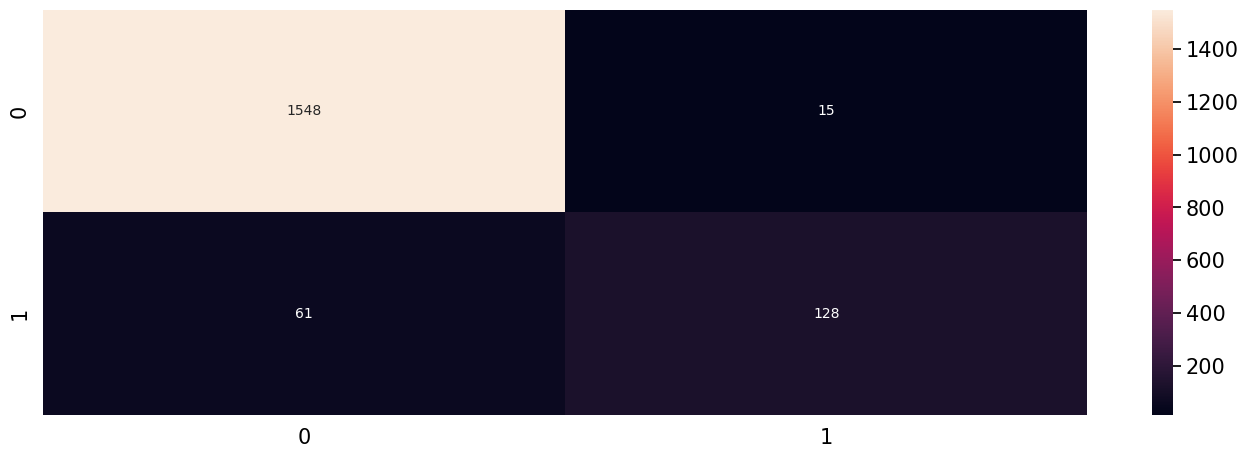

Specificity :  0.99
Cohen Kappa Score :  0.75
MCC Score :  0.76


In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('==============================================')
print('   Tuned Attn Based RNN-CNN Model Classifier  ')
print('==============================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))


CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))

# Model 6

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Dropout, Dense, MultiHeadAttention, LayerNormalization, Conv1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.models import Model

max_features = embedding_matrix.shape[0]
maxlen = 300
embed_size = 300

# Text input
sequence_input = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = Dropout(0.2)(x)

# Transformer Encoder
num_heads = 8
hidden_units = 512
dropout_rate = 0.1

# Multi-Head Self-Attention
attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=hidden_units // num_heads)(x, x)
x = LayerNormalization(epsilon=1e-6)(x + attention_output)
x = Dropout(dropout_rate)(x)

# Feed-Forward Neural Network
ffn_units = hidden_units * 4
x = Conv1D(filters=ffn_units, kernel_size=1, activation="relu")(x)
x = Conv1D(filters=hidden_units, kernel_size=1)(x)
x = GlobalMaxPooling1D()(x)

# Meta features input
meta_input_shape = meta_train.shape[1] if len(meta_train.shape) > 1 else 1
inputs_meta = Input(shape=(meta_input_shape,))

# Concatenate text and meta features
concatenated = concatenate([x, inputs_meta])

x = Dense(hidden_units, activation="relu")(concatenated)
x = Dropout(dropout_rate)(x)
x = Dense(hidden_units, activation="relu")(x)
x = Dropout(dropout_rate)(x)

# Output layer
preds = Dense(1, activation="sigmoid")(x)

# Define the model with both text and meta features as inputs
model = Model(inputs=[sequence_input, inputs_meta], outputs=preds)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 300, 300)       │      2,527,800 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 300, 300)       │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 300, 300)       │        616,236 │ dropout_6[0][0],       │
│ (MultiHeadAttention)      │                        │                │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 300, 300)       │              0 │ dropout_6[0][0],       │
│                           │                        │                │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 300, 300)       │            600 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 300, 300)       │              0 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 300, 2048)      │        616,448 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 300, 512)       │      1,049,088 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_5    │ (None, 512)            │              0 │ conv1d_5[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 38)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_8             │ (None, 550)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 512)            │        282,112 │ concatenate_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 512)            │              0 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 512)            │        262,656 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 512)            │              0 │ dense_12[0][0]         │
├──────────────────────

 Total params: 5,355,453 (20.43 MB)

 Trainable params: 2,827,653 (10.79 MB)

 Non-trainable params: 2,527,800 (9.64 MB)

In [ ]:
# Train the model with both text and meta features
history = model.fit([x_train, meta_train], y_train, validation_data=([x_val, meta_val], y_val),
          epochs=30, batch_size=128)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 953ms/step - accuracy: 0.8546 - loss: 0.5050 - val_accuracy: 0.8921 - val_loss: 0.2748
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.8921 - loss: 0.2849 - val_accuracy: 0.9172 - val_loss: 0.2203
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.9304 - loss: 0.1982 - val_accuracy: 0.9264 - val_loss: 0.1930
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9512 - loss: 0.1469 - val_accuracy: 0.9424 - val_loss: 0.1598
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9712 - loss: 0.0911 - val_accuracy: 0.9401 - val_loss: 0.1824
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9685 - loss: 0.0933 - val_accuracy: 0.9395 - val_loss: 0.1806
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.9740 - loss: 0.0829 - val_accuracy: 0.9395 - val_loss: 0.1943
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.9808 - loss: 0.0647 - val_accuracy: 0

128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
   Tuned Multi Head Attn Based RNN-CNN Model Classifier  

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1563
           1       0.86      0.67      0.76       189

    accuracy                           0.95      1752
   macro avg       0.91      0.83      0.87      1752
weighted avg       0.95      0.95      0.95      1752


 confussion matrix:
 [[1543   20]
 [  62  127]]


Train Accuracy :  0.99
Test Accuracy :  0.95
Precision Score :  0.95
Recall Score :  0.95
F1 Score :  0.95


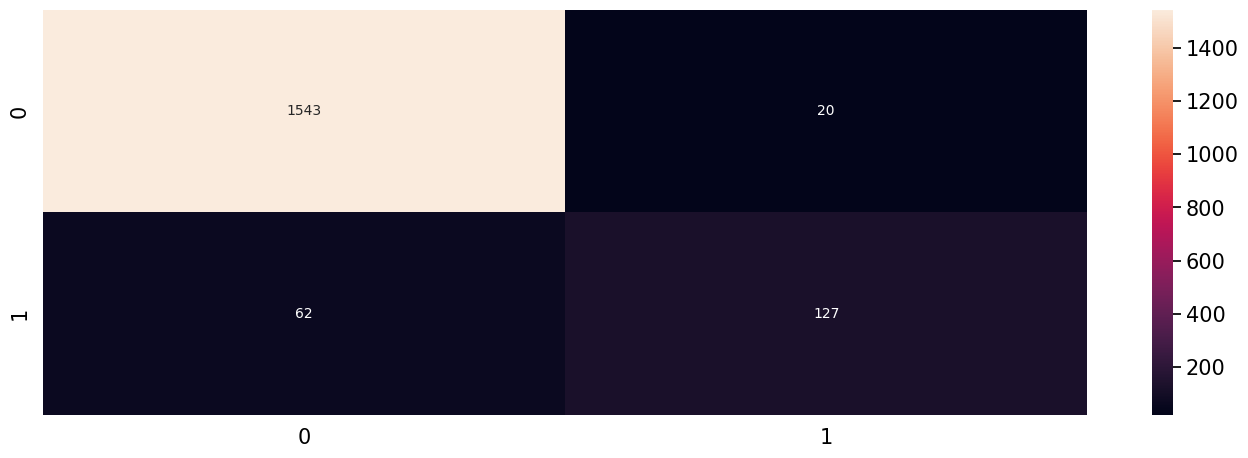

Specificity :  0.99
Cohen Kappa Score :  0.73
MCC Score :  0.74


In [ ]:
trainprediction = model.predict([x_train, meta_train])
prediction = model.predict([x_val, meta_val])

trainprediction = np.around(trainprediction.ravel())
prediction = np.around(prediction.ravel())

trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_val, prediction)
precision__score = precision_score(y_val, prediction,average = 'weighted')
recall__score = recall_score(y_val, prediction,average = 'weighted')
f1__score = f1_score(y_val, prediction,average = 'weighted')

print('=========================================================')
print('   Tuned Multi Head Attn Based RNN-CNN Model Classifier  ')
print('=========================================================')
print('\n clasification report:\n', classification_report(y_val,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_val, prediction))
print('\n')

print('Train Accuracy : ', np.round(trainaccuracy, 2))
print('Test Accuracy : ', np.round(testaccuracy, 2))

print('Precision Score : ', np.round(precision__score, 2))
print('Recall Score : ', np.round(recall__score, 2))
print('F1 Score : ', np.round(f1__score, 2))


CM = confusion_matrix(y_val, prediction)
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
Cohen_Kappa = metrics.cohen_kappa_score(y_val, prediction)
MCC = metrics.matthews_corrcoef(y_val, prediction)

print('Specificity : ', np.round(Specificity, 2))
print('Cohen Kappa Score : ', np.round(Cohen_Kappa, 2))
print('MCC Score : ', np.round(MCC, 2))